**ID A1812**

**Submission Date : 11/05/2019**

# House Prices: Advanced Regression Techniques

# Abstract:
House Price prediction is a very popular dataset for data science competition. In this dataset 79 explanatory variables describing (almost) every aspect of residential homes in Ames and Iowa. This competition challenges competitor to predict the final price of each home.

In this report my main focus is how artificial neural network performs for this kind of problems and how to improve performance of the prediction using artificial neural network.  So my elaboration on that section will be much more detailed.I have divided my work in four part and they are 
- <b> Data processing</b> where I have visualized, cleaned, handled missing data, carefully modified , removed and merged some features.
- <b> Testing multiple model </b> In this part I have used gradient boosting, decision tree, random forest regression , lasso and Artificial neural network on my pre processed data.
- <b> Artificial neural network implementation </b> In this section I have implemented ANN , performed parameter tuning, training, used grid search inside training and validate test score.
- <b> Cross Validation </b> In this part I have used k fold cross validation on my artificial neural network model to make sure if the Data is actually independent and to fine tune few parameters on whole dataset if the cross validation score is not same as validation score.
- <b> Ensemble learning </b> I have used bagging method for this section to improve my kaggle score.

# Score:
### Best Score : 0.12192 (using Ensemble Learning)

- ![](img/kaggle_score.png)


### Best score without Ensemble : 0.12324 (ANN only)

- ![](img/ann_base.png)

# Imports:

In the following section, I have imported all the necessary libraries that I will need to properly complete the
assignment.
- The 'Pandas' library will be used to store the 'Train' and 'Test' datasets. The particular data storing format is called a 'Dataframe'.
- The 'Numpy' library is used to make mathematical calculations easier and faster to do. 
- 'Matplotlib' and 'Seaborn' are used to plot graphs
- From the 'Scikit learn'(sklearn) library, I have imported some data processing methods, some evaluation metrics and some predictive models.


#### Gpu testing

In [73]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [74]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from sklearn.preprocessing import normalize,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
# %matplotlib widget
%matplotlib inline

# Data Pre-processing

### Load Data
The following block of code reads the two CSV (Comma Separated Values) files and then stores the data inside
them in two separate Dataframes named 'train' and 'test'.


In [75]:
train = pd.read_csv('train.csv')#.select_dtypes(exclude=['object'])
test = pd.read_csv('test.csv')#.select_dtypes(exclude=['object'])

#look into datatypes of the file
print("data types count")
train.dtypes.groupby(train.dtypes).count()


data types count


int64      35
float64     3
object     43
dtype: int64

### Looking into data

Here I am printing the first five entries in the train dataset to look into the actual data that I will be
working with. I gives me some insight about the data I am working with.


In [76]:
print('show sample')
pd.set_option('display.max_column', None)
train.head()

show sample


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Here I have used one of the built-in functions of pandas dataframe to display descriptive statistics that
summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


In [77]:
print('description of data')
train.describe()

description of data


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

This function shows scatter-plot and distribution plot. I am going to use it to see few of the features of the dataset and observe how it changes while I process the data. I will try not to remove data so instead of removing any data point I will observe them until all my data processing is complete. If I found out after all the processing some data points are really causing problem then I will drop it.

In [78]:
#For showing diffrence 
old_train_outlier_flag =train.copy()
old_test_outlier_flag =test.copy()
old_target_outlier_flag =train.SalePrice.copy()

# A FUNCTION THAT SHOWS SCATTER-PLOT AND DISTRIBUTION-PLOT
def outlier_check_plot(column, train_data_flag=train , test_data_flag=test , target=train.SalePrice ):
    plt.subplots(figsize=(19, 5))
    # SCATTER PLOT OF THE 19 HIGHEST-VALUES OF A COLUMN
    plt.subplot(1, 3, 1)
    plt.scatter(x = train_data_flag[column].sort_values(ascending=False)[:19], y = train.Id[:19], color='red', label='Train' )
    plt.scatter(x = test_data_flag[column].sort_values(ascending=False)[:19], y = test.Id[:19], label='Test')
    plt.ylabel('Serial Number', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 1: 19 highest-values of category {} \n in both train and test dataset'.format(column))
    plt.legend(loc='center',fontsize=13)
    # DISTRIBUTION-PLOT OF THE COLUMN
    plt.subplot(1, 3, 2)
    sns.distplot(train_data_flag[column],color='red', rug=True, hist=False, label='Train')
    sns.distplot(test_data_flag[column], rug=True, hist=False, label='Test')
    plt.ylabel('Distribution', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 2: Distribution-plot of category {} \n for both train and test dataset'.format(column))
    plt.legend(fontsize=13)
    # SCATTER-PLOT OF THE COLUMN WITH RESPECT TO SALEPRICE
    plt.subplot(1, 3, 3)
    plt.scatter(x = train_data_flag[column], y = target)
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 3: Scatter-plot of train-category {} \n with respect to SalePrice'.format(column))
    plt.show()


In [79]:
print('Before outlier-removal of 1stFlrSF: ')
outlier_check_plot('1stFlrSF')


Before outlier-removal of 1stFlrSF: 


We can see one value in train set that is highly contradictory with SalePrice (1stFlrSF is too high but SalePrice is too low). And there is only one such high-value
point available in test dataset. So we might want to remove this outlier.

In [80]:
print('Before outlier-removal of BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')


Before outlier-removal of BsmtFinSF1: 


/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


We can also see the same outlier here. 

Before outlier-removal of LotArea: 


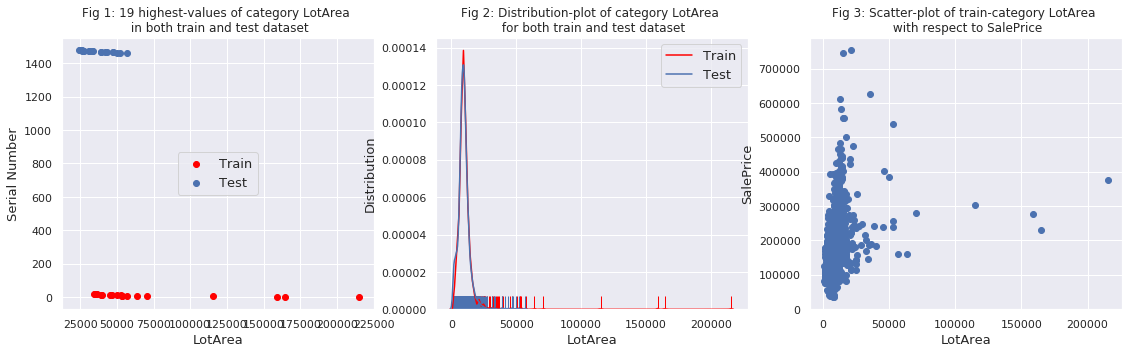

In [81]:
print('Before outlier-removal of LotArea: ')
outlier_check_plot('LotArea')


We can see in Fig 3 that there are 4 LotArea train-samples above 80000 that are very high in size but comperatively very low in SalePrice. Also there are no such
values present in test-data: Fig 1. So we can drop them


In [82]:
print('Before outlier-removal of GrLivArea: ')
outlier_check_plot('GrLivArea')


Before outlier-removal of GrLivArea: 


If we compare Fig. 3 with code-cell 13 we can see that two outliers are already common in GrLivArea. These two outliers of GrLivArea train-samples were above
4000 with very low SalePrice (below 300000). We are seeing same outlier again and again.


Before outlier-removal of MasVnrArea: 


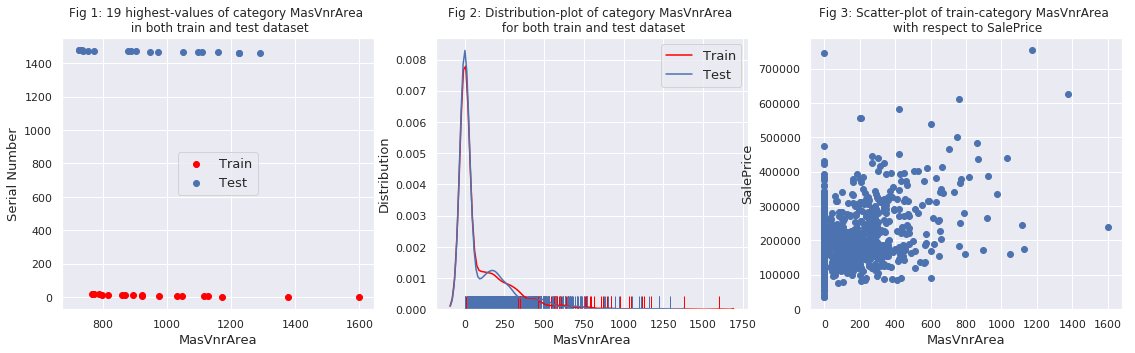

In [83]:
print('Before outlier-removal of MasVnrArea: ')
outlier_check_plot('MasVnrArea')


As we can see in Fig 3 that above 1500 there is 1 MasVnrArea train-samples that are very high in size but comperatively very low in SalePrice (below 300000) and
there is no such values present in test-data: Fig 1. But this case is not so common outlier in other sections so keeping it would be safe for now.

Before outlier-removal of LotFrontage: 


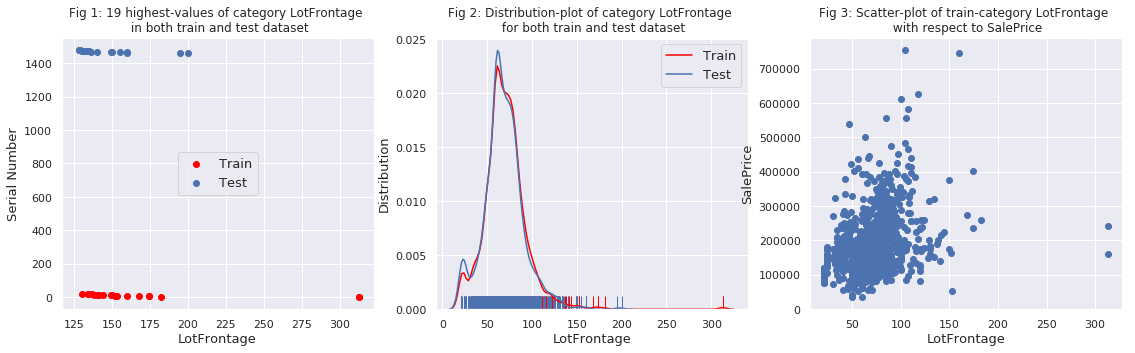

In [84]:
print('Before outlier-removal of LotFrontage: ')
outlier_check_plot('LotFrontage')


As we can see in Fig 3 that above 200 there is 1 LotFrontage train-samples that is very high in size but comperatively very low in SalePrice (below 300000) and
there is no such value present in test-data. But one of them seems to be the common outlier which is below 20000(saleprice). We should remove the common one and observe the other.


In [85]:
print('Before outlier-removal of TotalBsmtSF: ')
outlier_check_plot('TotalBsmtSF')


Before outlier-removal of TotalBsmtSF: 


We can also see the common outlier and we would be removing the common outlier in the next section.

## Common Outlier Remove

#### Saleprice vs GrLivArea

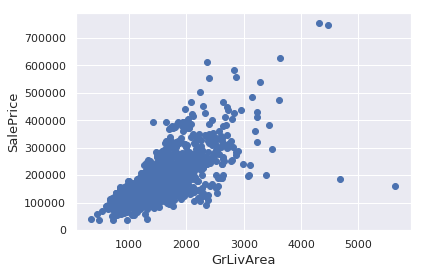

In [86]:

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

 There are a few houses with more than 4000 sq ft living area that are
 outliers, so we drop them from the training data.

In [87]:
train.drop(train[ (train["GrLivArea"] > 4000) & (train['SalePrice']<400000) ].index, inplace=True)

In [88]:
#Check the graph again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Its a linear relation so this feature is helpful to predict the price.

#### SalePrice vs TotalBsmSf

This relationship is also linear so we can expect that it also have great impact on the price.

In [89]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


We have removed the common outlier and now the graph seems better and we will follow up later after all the data pre processing. If any outlier remains after all processing I will remove them. 

### Relationship with categorical features

In [90]:
#box plot overallqual/saleprice
import seaborn as sns

var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

As expected saleprice increases when overall quality increases.

In [91]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We can see that people tends to spend more for newly built houses. Although its does not seems really a storong feature acording to plot but its really importent if we consider other parameters too. 

### Note
- 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
- 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We have analised  four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

## Correlation matrix (heatmap)

The correlation coefficient is a statistical calculation that is used to examine the relationship between two sets of data. The value of the correlation coefficient tells us about the strength and the nature of the relationship.

Correlation coefficient values can range between +1.00 to -1.00. If the value is exactly +1.00, it means that there is a "perfect" positive relationship between two numbers, while a value of exactly -1.00 indicates a "perfect" negative relationship.

If correlation is Positive then the values increase together and if the correlation is Negative, one value decreases as the other increases. When two sets of data are strongly linked together we say they have a High Correlation.



In [92]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, vmax=.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview the relationships of a dataset. 

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' is closely related to salePrice, but we can also see many other variables that should be taken into account. So we are zooming in. 

In [93]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Explanation 
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables.The number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are really close.Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

- 'TotalBsmtSF' and '1stFloor' also seem to be really close. We can keep 'TotalBsmtSF'
- 'FullBath' is really seems to be a important features.
- 'TotRmsAbvGrd' and 'GrLivArea' also seems very close we will decide later which to keep.
- 'YearBuilt' is slightly correlated with 'SalePrice'. 


## Missing Data

Important questions when thinking about missing data:

- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hiding an inconvenient truth.

In [94]:

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


Total   Percent
PoolQC         1452  0.995885
MiscFeature    1404  0.962963
Alley          1367  0.937586
Fence          1177  0.807270
FireplaceQu     690  0.473251
LotFrontage     259  0.177641
GarageCond       81  0.055556
GarageType       81  0.055556
GarageYrBlt      81  0.055556
GarageFinish     81  0.055556
GarageQual       81  0.055556
BsmtExposure     38  0.026063
BsmtFinType2     38  0.026063
BsmtFinType1     37  0.025377
BsmtCond         37  0.025377
BsmtQual         37  0.025377
MasVnrArea        8  0.005487
MasVnrType        8  0.005487
Electrical        1  0.000686
Utilities         0  0.000000

# Data processing
I have tried few approaches to data preprocessing. The current one was the best one for all the models.Below are the steps I have taken to preprocess the data.

- I have filled missing values of some data features with zero because these missing value means it does not exist in the house.

- I have label encoded the ordinal value containing features. Ordinal values are which are used something along the line of "Good","Average","Bad"

- I have label encodded object type data which are not ordinal in nature

- I have also done some feature engineering, meaning I have created some new features from already existing features.


### Lable Encoding

**Label Encoding** refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated.

In this dataset, there are lot of features which don't represent a quantitative value but rather is actually a label of some sort. For this particular dataset, almost all of the labeled values are in the form of 'string' or words. Only a couple of the labels are represented with numbers. For example, lets check the feature 'Alley', which denotes the type of alley access to  the property using the following labels. The meaning of the labels are also given

    Grvl	Gravel
    Pave	Paved
    NA 	No alley access

In the real world, labels are in the form of words, because words are human readable. So it makes sense from that perspective. But when it comes tho machine learning models, which works with numbers, we hit a bit of a roadblock. To remedy this, there is a need to use Label Encoding. Label encoding refers to the process of transforming the word labels into numerical form. This enables the algorithms to operate on data that have textual labels

In case of the labels there are two distinct types, "nominal" and "ordinal". The terms "nominal" and "ordinal" refer to different types of categorizable data. 

"Nominal" data assigns names to each data point without placing it in some sort of order. For example, the results of a test could be each classified nominally as a "pass" or "fail."

"Ordinal" data groups data according to some sort of ranking system: it orders the data. For example, this dataset has a very common ranking system which is as follows

    Ex	Excellent
    Gd	Good
    TA	Average/Typical
    Fa	Fair
    Po	Poor


## Imputing missing data
Two of these following part would be used in the common data processing section to impute missing data.

In [95]:
lot_frontage_by_neighborhood = train["LotFrontage"].groupby(train["Neighborhood"])

Following function will be used to convert categorical features as number. 

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def factorize(df, factor_df, column, fill_na=None):
    factor_df[column] = df[column]
    if fill_na is not None:
        factor_df[column].fillna(fill_na, inplace=True)
    le.fit(factor_df[column].unique())
    factor_df[column] = le.transform(factor_df[column])
    return factor_df

## common data processing:
In this part we have label encoded some of the columns because some features are ordinal. I have replaced some null value with zero because in those case they probably meant that it may not exist . Finally I have merged some of the features to get a better feature. 

<b> Befor starting following block its important to understand which feature means what so that describing my work would be easier </b>

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
-    LandSlope: Slope of property
-    Neighborhood: Physical locations within Ames city limits
-    Condition1: Proximity to main road or railroad
-    Condition2: Proximity to main road or railroad (if a second is present)
-    BldgType: Type of dwelling
-    HouseStyle: Style of dwelling
-    OverallQual: Overall material and finish quality
-    OverallCond: Overall condition rating
-    YearBuilt: Original construction date
-    YearRemodAdd: Remodel date
-    RoofStyle: Type of roof
-    RoofMatl: Roof material
-    Exterior1st: Exterior covering on house
-    Exterior2nd: Exterior covering on house (if more than one material)
-    MasVnrType: Masonry veneer type
-    MasVnrArea: Masonry veneer area in square feet
-    ExterQual: Exterior material quality
-    ExterCond: Present condition of the material on the exterior
-    Foundation: Type of foundation
-    BsmtQual: Height of the basement
-    BsmtCond: General condition of the basement
-    BsmtExposure: Walkout or garden level basement walls
-    BsmtFinType1: Quality of basement finished area
-    BsmtFinSF1: Type 1 finished square feet
-    BsmtFinType2: Quality of second finished area (if present)
-    BsmtFinSF2: Type 2 finished square feet
-    BsmtUnfSF: Unfinished square feet of basement area
-    TotalBsmtSF: Total square feet of basement area
-    Heating: Type of heating
-    HeatingQC: Heating quality and condition
-    CentralAir: Central air conditioning
-    Electrical: Electrical system
-    1stFlrSF: First Floor square feet
-    2ndFlrSF: Second floor square feet
-    LowQualFinSF: Low quality finished square feet (all floors)
-    GrLivArea: Above grade (ground) living area square feet
-    BsmtFullBath: Basement full bathrooms
-    BsmtHalfBath: Basement half bathrooms
-   FullBath: Full bathrooms above grade
-  HalfBath: Half baths above grade
-   Bedroom: Number of bedrooms above basement level
-  Kitchen: Number of kitchens
-  KitchenQual: Kitchen quality
-  TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
-    -GarageType: Garage location
-    GarageYrBlt: Year garage was built
-    GarageFinish: Interior finish of the garage
-    GarageCars: Size of garage in car capacity
-    GarageArea: Size of garage in square feet
-    GarageQual: Garage quality
-    GarageCond: Garage condition
-    PavedDrive: Paved driveway
-    WoodDeckSF: Wood deck area in square feet
-    OpenPorchSF: Open porch area in square feet
-    EnclosedPorch: Enclosed porch area in square feet
-    3SsnPorch: Three season porch area in square feet
-    ScreenPorch: Screen porch area in square feet
-    PoolArea: Pool area in square feet
-    PoolQC: Pool quality
-    Fence: Fence quality
-   MiscFeature: Miscellaneous feature not covered in other categories
-   MiscVal: $Value of miscellaneous feature
-    MoSold: Month Sold
-    YrSold: Year Sold
-    SaleType: Type of sale
-    SaleCondition: Condition of sale

In [97]:
def data_process(df):
    all_df = pd.DataFrame(index = df.index)

    all_df["LotFrontage"] = df["LotFrontage"]   
    for key, group in lot_frontage_by_neighborhood:
        #Filling in missing LotFrontage values by the median
        idx = (df["Neighborhood"] == key) & (df["LotFrontage"].isnull())
        all_df.loc[idx, "LotFrontage"] = group.median()    
        all_df["LotArea"] = df["LotArea"]

    all_df["MasVnrArea"] = df["MasVnrArea"]
    all_df["MasVnrArea"].fillna(0, inplace=True)
   
    all_df["BsmtFinSF1"] = df["BsmtFinSF1"]
    all_df["BsmtFinSF1"].fillna(0, inplace=True)

    all_df["BsmtFinSF2"] = df["BsmtFinSF2"]
    all_df["BsmtFinSF2"].fillna(0, inplace=True)

    all_df["BsmtUnfSF"] = df["BsmtUnfSF"]
    all_df["BsmtUnfSF"].fillna(0, inplace=True)

    all_df["TotalBsmtSF"] = df["TotalBsmtSF"]
    all_df["TotalBsmtSF"].fillna(0, inplace=True)

    all_df["1stFlrSF"] = df["1stFlrSF"]
    all_df["2ndFlrSF"] = df["2ndFlrSF"]
    all_df["GrLivArea"] = df["GrLivArea"]
    
    all_df["GarageArea"] = df["GarageArea"]
    all_df["GarageArea"].fillna(0, inplace=True)

    all_df["WoodDeckSF"] = df["WoodDeckSF"]
    all_df["OpenPorchSF"] = df["OpenPorchSF"]
    all_df["EnclosedPorch"] = df["EnclosedPorch"]
    all_df["3SsnPorch"] = df["3SsnPorch"]
    all_df["ScreenPorch"] = df["ScreenPorch"]
    
    all_df["BsmtFullBath"] = df["BsmtFullBath"]
    all_df["BsmtFullBath"].fillna(0, inplace=True)

    all_df["BsmtHalfBath"] = df["BsmtHalfBath"]
    all_df["BsmtHalfBath"].fillna(0, inplace=True)

    all_df["FullBath"] = df["FullBath"] 
    all_df["HalfBath"] = df["HalfBath"] 
    all_df["BedroomAbvGr"] = df["BedroomAbvGr"] 
    all_df["KitchenAbvGr"] = df["KitchenAbvGr"] 
    all_df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"] 
    all_df["Fireplaces"] = df["Fireplaces"] 

    all_df["GarageCars"] = df["GarageCars"]
    all_df["GarageCars"].fillna(0, inplace=True)

    all_df["CentralAir"] = (df["CentralAir"] == "Y") * 1.0
   
    all_df["OverallQual"] = df["OverallQual"]
    all_df["OverallCond"] = df["OverallCond"]

    
    """following case are ordinal so we are performing label encoding here"""
    
    nan = float('nan')
    qual_dict = {nan: 0, "NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    all_df["ExterQual"] = df["ExterQual"].map(qual_dict).astype(int)
    all_df["ExterCond"] = df["ExterCond"].map(qual_dict).astype(int)
    all_df["BsmtQual"] = df["BsmtQual"].map(qual_dict).astype(int)
    all_df["BsmtCond"] = df["BsmtCond"].map(qual_dict).astype(int)
    all_df["HeatingQC"] = df["HeatingQC"].map(qual_dict).astype(int)
    all_df["KitchenQual"] = df["KitchenQual"].map(qual_dict).astype(int)
    all_df["FireplaceQu"] = df["FireplaceQu"].map(qual_dict).astype(int)
    all_df["GarageQual"] = df["GarageQual"].map(qual_dict).astype(int)
    all_df["GarageCond"] = df["GarageCond"].map(qual_dict).astype(int)

    all_df["BsmtExposure"] = df["BsmtExposure"].map(
        {nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

    bsmt_fin_dict = {nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
    all_df["BsmtFinType1"] = df["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
    all_df["BsmtFinType2"] = df["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

    all_df["Functional"] = df["Functional"].map(
        {nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, 
         "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

    all_df["GarageFinish"] = df["GarageFinish"].map(
        {nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)

    all_df["Fence"] = df["Fence"].map(
        {nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

    all_df["PoolQC"] = df["PoolQC"].map(qual_dict).astype(int)
    
    all_df["YearBuilt"] = df["YearBuilt"]
    all_df["YearRemodAdd"] = df["YearRemodAdd"]

    all_df["GarageYrBlt"] = df["GarageYrBlt"]
    all_df["GarageYrBlt"].fillna(0.0, inplace=True)

    all_df["MoSold"] = df["MoSold"]
    all_df["YrSold"] = df["YrSold"]
    
    all_df["LowQualFinSF"] = df["LowQualFinSF"]
    all_df["MiscVal"] = df["MiscVal"]

    all_df["PoolQC"] = df["PoolQC"].map(qual_dict).astype(int)

    all_df["PoolArea"] = df["PoolArea"]
    all_df["PoolArea"].fillna(0, inplace=True)
    
    # Add categorical features as numbers too. It seems to help a bit.
    all_df = factorize(df, all_df, "MSSubClass")
    all_df = factorize(df, all_df, "MSZoning", "RL")
    all_df = factorize(df, all_df, "LotConfig")
    all_df = factorize(df, all_df, "Neighborhood")
    all_df = factorize(df, all_df, "Condition1")
    all_df = factorize(df, all_df, "BldgType")
    all_df = factorize(df, all_df, "HouseStyle")
    all_df = factorize(df, all_df, "RoofStyle")
    all_df = factorize(df, all_df, "Exterior1st", "Other")
    all_df = factorize(df, all_df, "Exterior2nd", "Other")
    all_df = factorize(df, all_df, "MasVnrType", "None")
    all_df = factorize(df, all_df, "Foundation")
    all_df = factorize(df, all_df, "SaleType", "Oth")
    all_df = factorize(df, all_df, "SaleCondition")

    """In following code I am converting values of those features as 0 or 1"""
    
    # IR2 and IR3 don't appear that often, so just make a distinction
    # between regular and irregular.
    all_df["IsRegularLotShape"] = (df["LotShape"] == "Reg") * 1

    # Most properties are level; bin the other possibilities together
    # as "not level".
    all_df["IsLandLevel"] = (df["LandContour"] == "Lvl") * 1

    # Most land slopes are gentle; treat the others as "not gentle".
    all_df["IsLandSlopeGentle"] = (df["LandSlope"] == "Gtl") * 1

    # Most properties use standard circuit breakers.
    all_df["IsElectricalSBrkr"] = (df["Electrical"] == "SBrkr") * 1

    # About 2/3rd have an attached garage.
    all_df["IsGarageDetached"] = (df["GarageType"] == "Detchd") * 1

    # Most have a paved drive. Treat dirt/gravel and partial pavement
    # as "not paved".
    all_df["IsPavedDrive"] = (df["PavedDrive"] == "Y") * 1

    # The only interesting "misc. feature" is the presence of a shed.
    all_df["HasShed"] = (df["MiscFeature"] == "Shed") * 1.  

    # If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
    all_df["Remodeled"] = (all_df["YearRemodAdd"] != all_df["YearBuilt"]) * 1
    
    # Did a remodeling happen in the year the house was sold?
    all_df["RecentRemodel"] = (all_df["YearRemodAdd"] == all_df["YrSold"]) * 1
    
    # Was this house sold in the year it was built?
    all_df["VeryNewHouse"] = (all_df["YearBuilt"] == all_df["YrSold"]) * 1

    all_df["Has2ndFloor"] = (all_df["2ndFlrSF"] == 0) * 1
    all_df["HasMasVnr"] = (all_df["MasVnrArea"] == 0) * 1
    all_df["HasWoodDeck"] = (all_df["WoodDeckSF"] == 0) * 1
    all_df["HasOpenPorch"] = (all_df["OpenPorchSF"] == 0) * 1
    all_df["HasEnclosedPorch"] = (all_df["EnclosedPorch"] == 0) * 1
    all_df["Has3SsnPorch"] = (all_df["3SsnPorch"] == 0) * 1
    all_df["HasScreenPorch"] = (all_df["ScreenPorch"] == 0) * 1
    
    # Months with the largest number of deals may be significant.
#     mx = max(train["MoSold"].groupby(train["MoSold"]).count())
#     all_df["HighSeason"] = df["MoSold"].replace(
#         train["MoSold"].groupby(train["MoSold"]).count()/mx)

#     mx = max(train["MSSubClass"].groupby(train["MSSubClass"]).count())
#     all_df["NewerDwelling"] = df["MSSubClass"].replace(
#         train["MSSubClass"].groupby(train["MSSubClass"]).count()/mx)  

    # following portion was calculated with above commented part of the code.
    # Instead of the fraction value putting binary value helps for generalization 
    all_df["HighSeason"] = df["MoSold"].replace( 
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

    all_df["NewerDwelling"] = df["MSSubClass"].replace(
        {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
         90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})   
    
    
    all_df.loc[df.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
    all_df["Neighborhood_Good"].fillna(0, inplace=True)
    
    # House completed before sale or not
    all_df["SaleCondition_PriceDown"] = df.SaleCondition.replace(
        {'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

    # House completed before sale or not
    all_df["BoughtOffPlan"] = df.SaleCondition.replace(
        {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
    
    all_df["BadHeating"] = df.HeatingQC.replace(
        {'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

    area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]
    all_df["TotalArea"] = all_df[area_cols].sum(axis=1)

    all_df["TotalArea1st2nd"] = all_df["1stFlrSF"] + all_df["2ndFlrSF"]

    all_df["Age"] = 2010 - all_df["YearBuilt"]
    all_df["TimeSinceSold"] = 2010 - all_df["YrSold"]

    all_df["SeasonSold"] = all_df["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 
                                                  6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
    
    all_df["YearsSinceRemodel"] = all_df["YrSold"] - all_df["YearRemodAdd"]
    
    # Simplifications of existing features into bad/average/good.
    all_df["SimplOverallQual"] = all_df.OverallQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
    all_df["SimplOverallCond"] = all_df.OverallCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
    all_df["SimplPoolQC"] = all_df.PoolQC.replace(
        {1 : 1, 2 : 1, 3 : 2, 4 : 2})
    all_df["SimplGarageCond"] = all_df.GarageCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplGarageQual"] = all_df.GarageQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFunctional"] = all_df.Functional.replace(
        {1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
    all_df["SimplKitchenQual"] = all_df.KitchenQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplHeatingQC"] = all_df.HeatingQC.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplBsmtFinType1"] = all_df.BsmtFinType1.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
    all_df["SimplBsmtFinType2"] = all_df.BsmtFinType2.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
    all_df["SimplBsmtCond"] = all_df.BsmtCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplBsmtQual"] = all_df.BsmtQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplExterCond"] = all_df.ExterCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplExterQual"] = all_df.ExterQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
            
    # Bin by neighborhood (a little arbitrarily). Values were computed by: 
    # train_df["SalePrice"].groupby(train_df["Neighborhood"]).median().sort_values()
    neighborhood_map = {
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "NAmes" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
    }

    all_df["NeighborhoodBin"] = df["Neighborhood"].map(neighborhood_map)
    return all_df

In the above block I have done following operations :

- Filled with 0 for some features like "MasVnrArea", "BsmtFinSF1"  "BsmtFinSF2" "BsmtUnfSF" "TotalBsmtSF" "GarageArea" "BsmtFullBath" "BsmtHalfBath" "GarageCars" "PoolArea" "GarageYrBlt" .According to the documentation of the dataset if these features have any field empty then that means the feature is not available. So I have done this operation according to documentation of the dataset.

- CentralAir feature was given has two field only 'Y' or 'N' so I have converted that to 0 or 1
- For some ordinal features I ave performed lable encoding to map data to a numerical features. Those features are ExterQual , ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual etc
- I have converted some features from categorical to numerical and those features are MSSubClass, MSZoning , LotConfig, RL , LotConfig,Neighborhood, Condition1 ,BldgType,  HouseStyle , HouseStyle, Exterior1st, Other, Exterior2nd, MasVnrType, Foundation, SaleType and SaleCondition

- Converted fields of some Features to 0 or 1 based on the understanding of the dataset and a little bit research. What I have done is that I have made simplified versions of existing features. For example, the Land Slope feature lets us know what type of slope the property has. Even though is has multiple labels, it all comes down to if the slope is gentle or not. Hence I have created a new feature called IsLandSlopeGentle, which is effectively tells us if the slope is gentle (==1) or is it not gentle (==0).Those features with the changing reasons are given below
    - IsRegularLotShape : Field IR2 and IR3 don't appear that often, so just make a distinction between regular and irregular.
    - IsLandLevel : Most land slopes are gentle; treat the others as "not gentle".
    - IsElectricalSBrkr : Most properties use standard circuit breakers.
    - IsGarageDetached : About 2/3rd have an attached garage.
    - IsPavedDrive : Most have a paved drive. Treat dirt/gravel and partial pavement as "not paved".
    - HasShed : The only interesting "misc. feature" is the presence of a shed.
    - Remodeled : If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
    - RecentRemodel : Did a remodeling happen in the year the house was sold?
    - VeryNewHouse : Was this house sold in the year it was built?
    - sofe other features dont need to describe they are self explanatory Has2ndFloor , HasMasVnr , HasWoodDeck .HasOpenPorch ,HasEnclosedPorch ,Has3SsnPorch , HasScreenPorch
- Simplifications of existing features into bad/average/good. Features : SimplOverallQual, SimplOverallCond, SimplPoolQC ,SimplGarageCond, SimplGarageQual, SimplFireplaceQu ,SimplFunctional ,SimplKitchenQual, SimplHeatingQC ,SimplBsmtFinType1, SimplBsmtFinType2 ,SimplBsmtCond , SimplBsmtQual ,SimplExterCond ,SimplExterQual.

- mapped neighborhood based on their quality.The mapping is as followed:
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "NAmes" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
        - the number after hash is actually median priece of that location. 


In [98]:
train_processed = data_process(train)
test_processed = data_process(test)

print("shape of train :" , train_processed.shape)
print("shape of test :" , test_processed.shape)


shape of train : (1458, 111)
shape of test : (1459, 111)


Keeping NeighborhoodBin into a temporary DataFrame because we want to use the unscaled version later on (to one-hot encode it). 

In [99]:
# Keeping NeighborhoodBin into a temporary DataFrame because we want to use the
# unscaled version later on (to one-hot encode it). 
neighborhood_bin_train = pd.DataFrame(index = train.index)
neighborhood_bin_train["NeighborhoodBin"] = train_processed["NeighborhoodBin"]
neighborhood_bin_test = pd.DataFrame(index = test.index)
neighborhood_bin_test["NeighborhoodBin"] = test_processed["NeighborhoodBin"]


## Skewness, Normalization & Standardization

According to Hair et al. (2013), four assumptions should be tested:

- **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

- **Homoscedasticity** -  Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

- **Linearity** - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

- **standardization** is the process of putting different variables on the same scale. This process allows you to compare scores between different types of variables. Typically, to standardize variables, you calculate the mean and standard deviation for a variable. Then, for each observed value of the variable, you subtract the mean and divide by the standard deviation.

Skewness, in basic terms, implies off-centre, so does in statistics, it means lack of symmetry. With the help of skewness, one can identify the shape of the distribution of data.

In the simplest cases, normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging.Some types of normalization involve only a rescaling, to arrive at values relative to some size variable.


We will remove skewness through normalization and then scale all the numeric features using standardization technique (Except SalePrice).

### skewness train set

In the following part we are looking at skewness of training set and we can see that many features are highly skewed. We will be solving it with log transformation.

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

In [100]:
# keeping train and test data in a flag for comparison purpose
old_train_skewness_flag = train_processed.copy()
old_test_skewness_flag = test_processed.copy()
old_target_skewness_flag= train["SalePrice"].copy()
# old_target_skewness_flag

In [101]:
from scipy.stats import skew
numeric_features = train_processed.dtypes[train_processed.dtypes != "object"].index
skewness = train_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)
plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()

**Observation**
- A significant number of observations with value zero (houses without basement).
- A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we need to add 1 and then perform log transform operation.
**Note** :
For real-valued input, log1p is accurate also for x so small that 1 + x == 1 in floating-point accuracy.

In [102]:
numeric_features = train_processed.dtypes[train_processed.dtypes != "object"].index

# Transform the skewed numeric features by taking log(feature + 1).
# This will make the features more normal.
from scipy.stats import skew

skewed = train_processed[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[(skewed < -0.75) | (skewed > 0.75)]
skewed = skewed.index

train_processed[skewed] = np.log1p(train_processed[skewed])


# Additional processing: scale the data.   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(train_processed[numeric_features])

for i, col in enumerate(numeric_features):
    train_processed[col] = scaled[:, i]

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


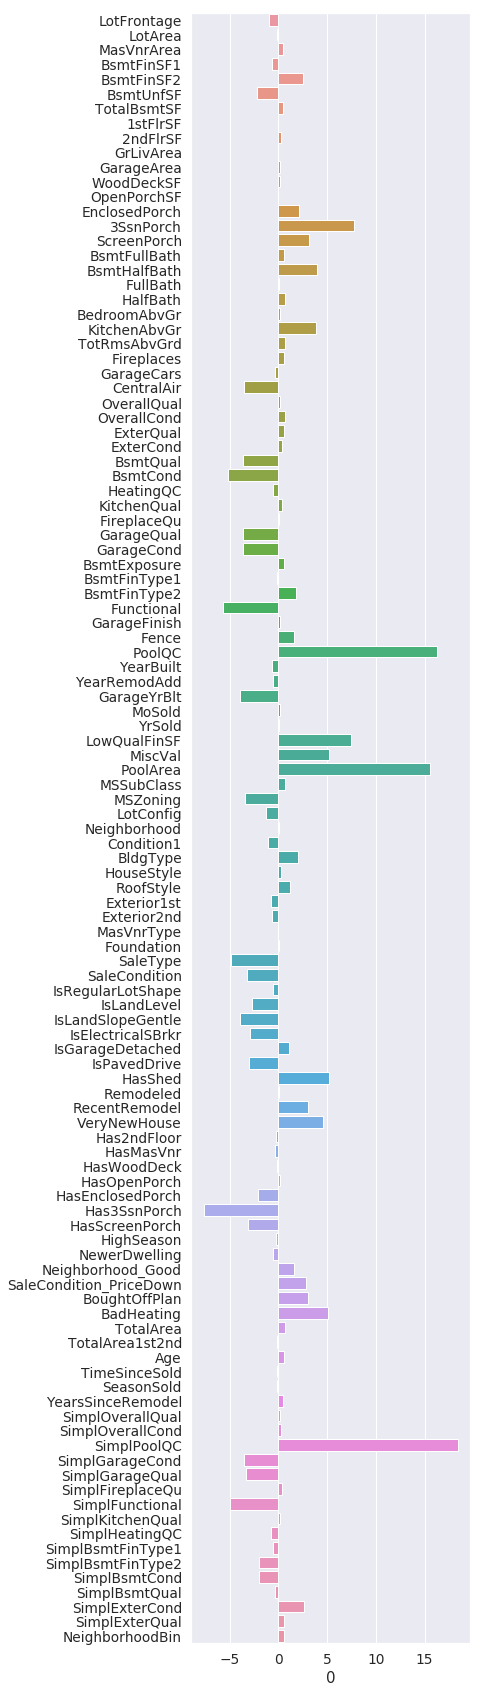

In [103]:
from scipy.stats import skew
numeric_features = train_processed.dtypes[train_processed.dtypes != "object"].index
skewness = train_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)
plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()

We can see that skewness of the following features decreased a lot:
- LotArea
- WoodDeskSf
- OpenPorch
- Extencond
- MiscVal
- TotalArea

But other numeric features also improved its skewness a little bit.

### Test Skewness

We need to perform same operation on given test set too. Otherwise we woun't be able to predict correctly.

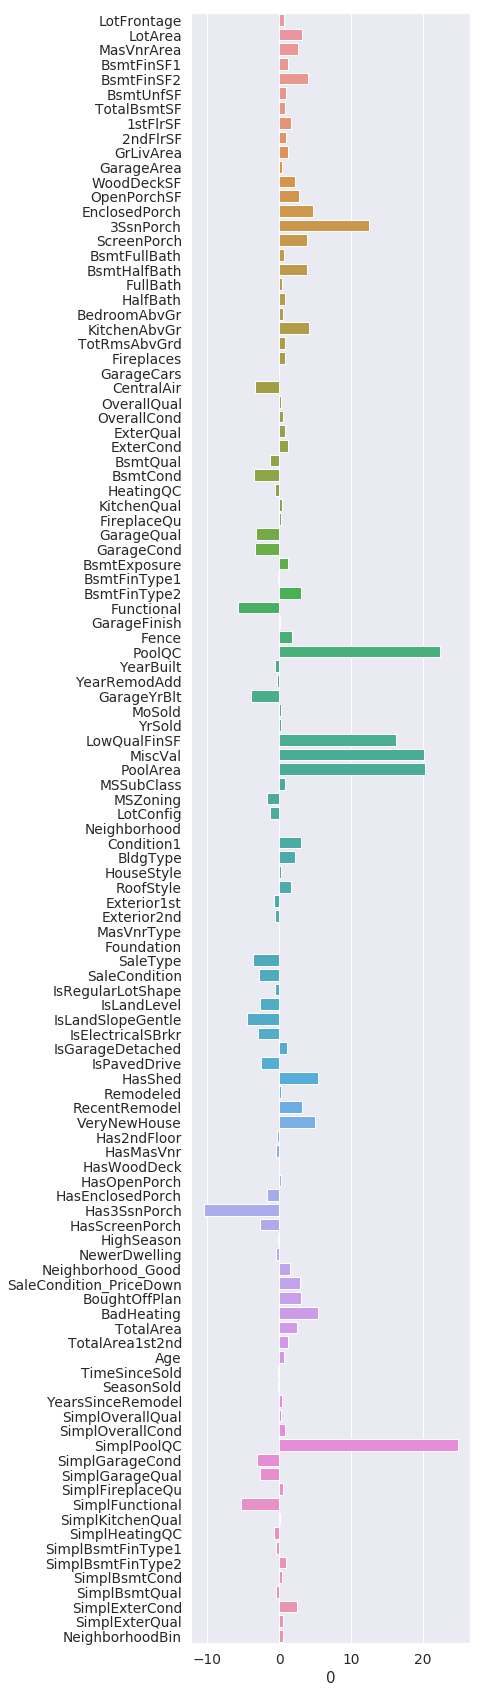

In [104]:
numeric_features = test_processed.dtypes[train_processed.dtypes != "object"].index
skewness = test_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)

plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()
# print('skew: ',test_processed[numeric_features].skew())

In [105]:
numeric_features = test_processed.dtypes[train_processed.dtypes != "object"].index

# Transform the skewed numeric features by taking log(feature + 1).
# This will make the features more normal.
from scipy.stats import skew

skewed = test_processed[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[(skewed < -0.75) | (skewed > 0.75)]
skewed = skewed.index

test_processed[skewed] = np.log1p(test_processed[skewed])

# Additional processing: scale the data.   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled = scaler.fit_transform(test_processed[numeric_features])
for i, col in enumerate(numeric_features):
    test_processed[col] = scaled[:, i]

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**Observation**
- A significant number of observations with value zero (houses without basement).
- A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we need to add 1 and then perform log transform operation.
**Note** :
For real-valued input, log1p is accurate also for x so small that 1 + x == 1 in floating-point accuracy.

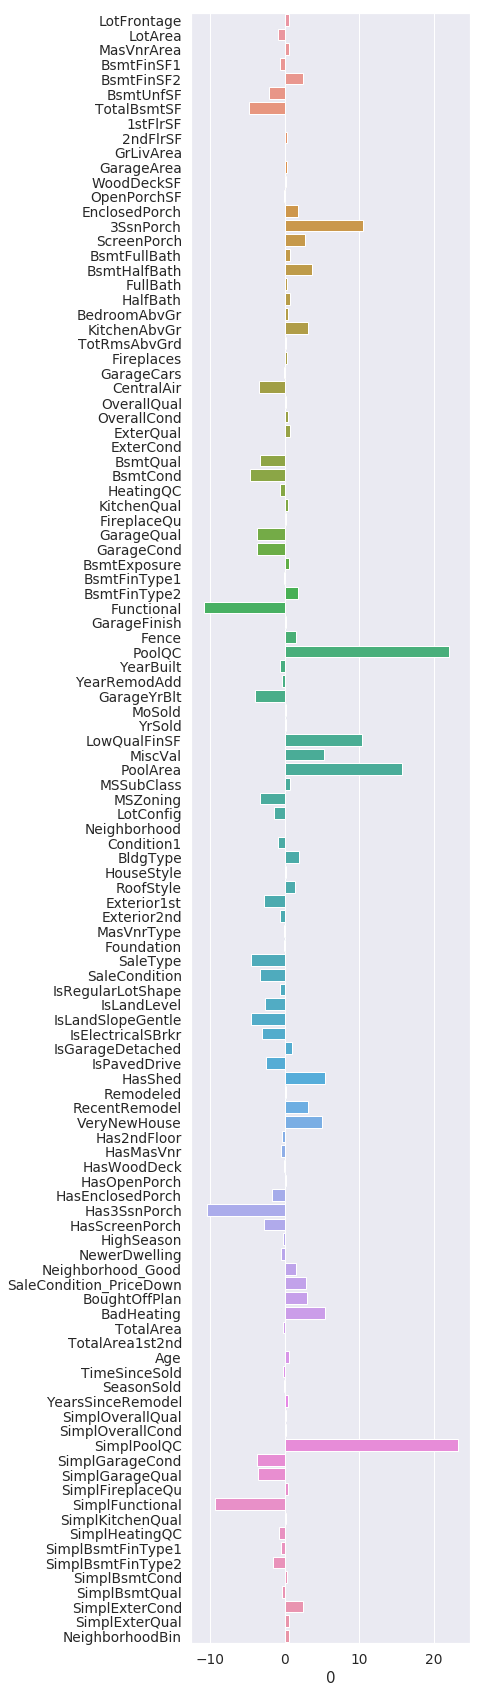

In [106]:
numeric_features = test_processed.dtypes[train_processed.dtypes != "object"].index
skewness = test_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)

plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()
# print('skew: ',test_processed[numeric_features].skew())

We can see that skewness of the following features decreased a lot:
- LotArea
- WoodDeckSF
- OpenPorchSF
- ExterCond
- MiscVal
- TotalArea

But other numeric features also improved its skewness a little bit.

### Observation
In this section we will observe how Distribution plot changes due to normalization and standardization of the numeric features. In the first line of plot we would be able to see the distribution before skewness section starts and every second line we will see how it changes due to skewness removal and standardization. Fig-2 is the distribution plot so we should observe it carefully. We can observe that how much skewness of the data is lost due to normalization. Fig-3 will show the relation between SalePrice and and the feature. If the relation between them is linear or close to linear then that will help us in training.

***Before skewness removal:***

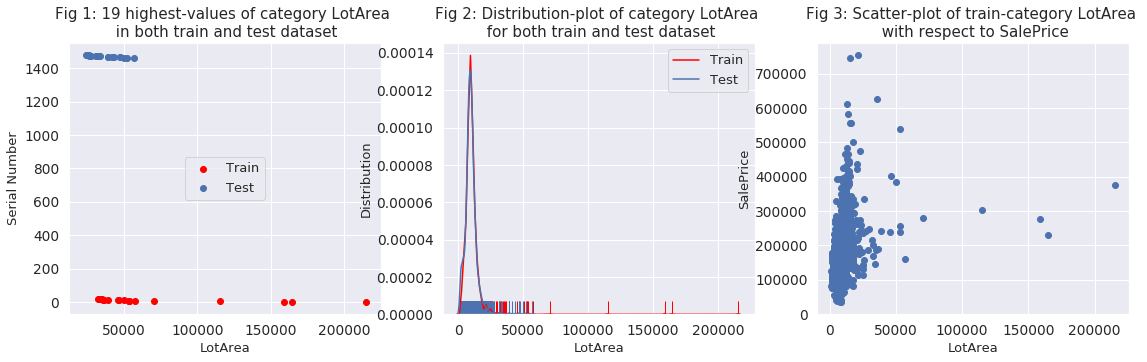

***After skewness removal:***

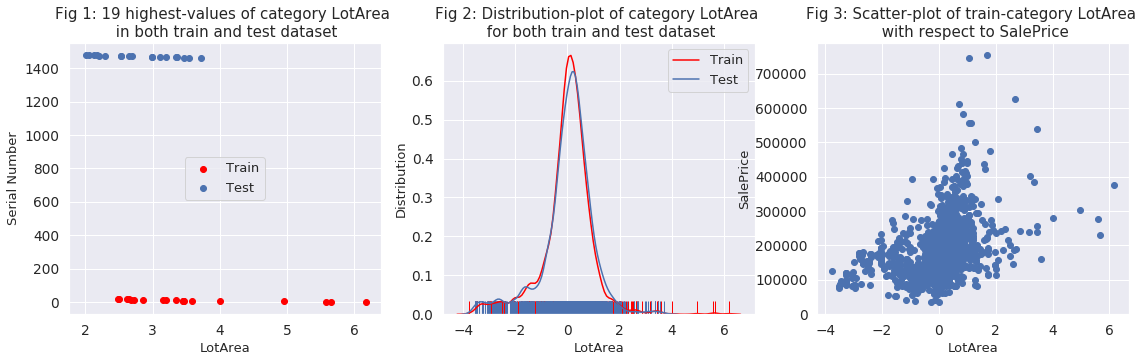

***Before skewness removal:***

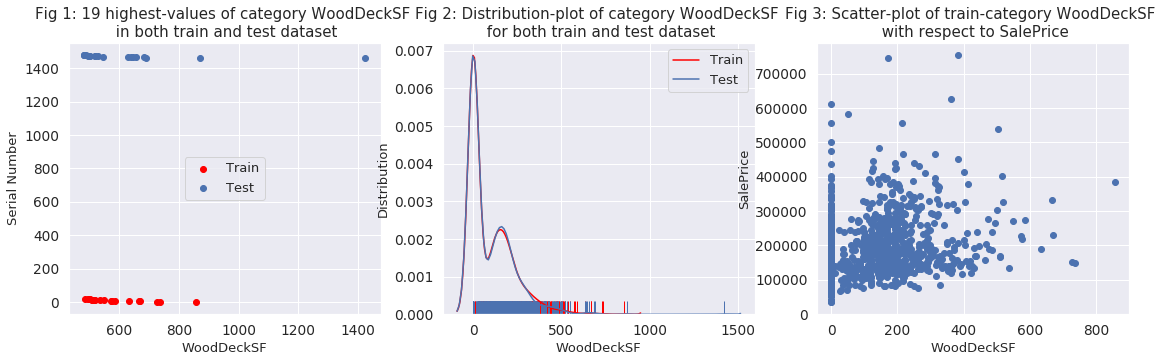

***After skewness removal:***

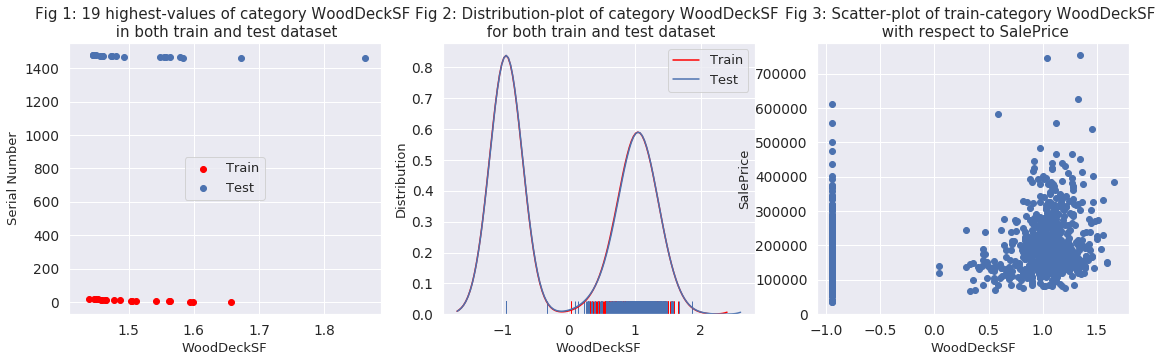

***Before skewness removal:***

***After skewness removal:***

***Before skewness removal:***

***After skewness removal:***

***Before skewness removal:***

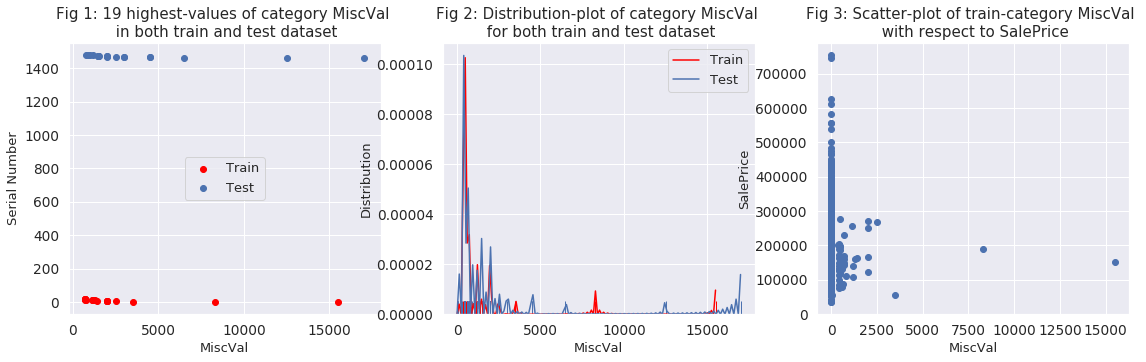

***After skewness removal:***

***Before skewness removal:***

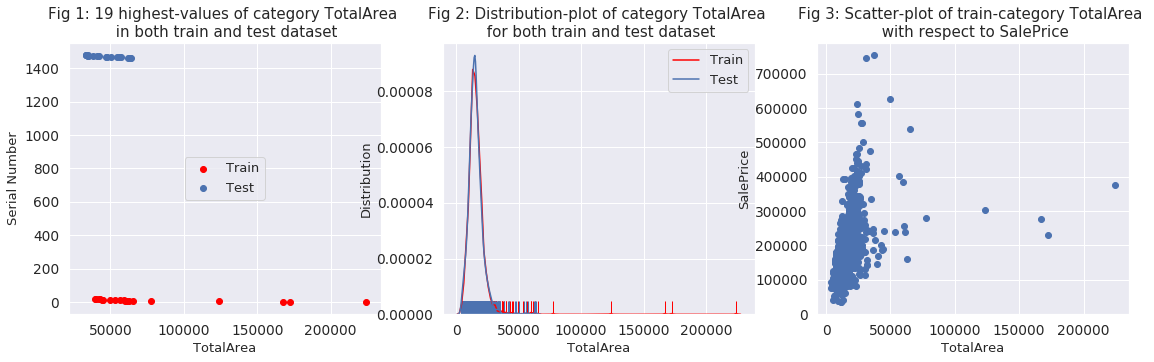

***After skewness removal:***

In [107]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown("***"+string+"***"))
    
printmd('Before skewness removal:')
outlier_check_plot('LotArea',old_train_skewness_flag, old_test_skewness_flag, old_target_skewness_flag)
printmd('After skewness removal:')
outlier_check_plot('LotArea' , train_processed, test_processed, old_target_skewness_flag)

printmd('Before skewness removal:')
outlier_check_plot('WoodDeckSF',old_train_skewness_flag, old_test_skewness_flag, old_target_skewness_flag)
printmd('After skewness removal:')
outlier_check_plot('WoodDeckSF', train_processed, test_processed, old_target_skewness_flag)

printmd('Before skewness removal:')
outlier_check_plot('OpenPorchSF',old_train_skewness_flag, old_test_skewness_flag, old_target_skewness_flag)
printmd('After skewness removal:')
outlier_check_plot('OpenPorchSF', train_processed, test_processed, old_target_skewness_flag)

printmd('Before skewness removal:')
outlier_check_plot('ExterCond',old_train_skewness_flag, old_test_skewness_flag, old_target_skewness_flag)
printmd('After skewness removal:')
outlier_check_plot('ExterCond', train_processed, test_processed, old_target_skewness_flag)

printmd('Before skewness removal:')
outlier_check_plot('MiscVal',old_train_skewness_flag, old_test_skewness_flag, old_target_skewness_flag)
printmd('After skewness removal:')
outlier_check_plot('MiscVal', train_processed, test_processed, old_target_skewness_flag)

printmd('Before skewness removal:')
outlier_check_plot('TotalArea',old_train_skewness_flag, old_test_skewness_flag, old_target_skewness_flag)
printmd('After skewness removal:')
outlier_check_plot('TotalArea', train_processed, test_processed, old_target_skewness_flag)



Most of the scatterplot now seems that they have more linear relationship with saleprice and the distribution graphs are less skewed and close to normal distribution. Finally due to standarization all of the features are now in same scale this will also help us to converge. We can see that the distribution improved a little bit due to log transformation.

## Additional processing to scale the data.   

### One hot encoding
To encode categorical integer features as a one-hot numeric array we are using one hot encoding. This will transform each value of catagories into a features and make those a column value of dataframe. Finally put binary values in the rows of those column.

In [108]:
# for example:

# ╔════════════╦═════════════════╦════════╗ 
# ║ CompanyName Categoricalvalue ║ Price  ║
# ╠════════════╬═════════════════╣════════║ 
# ║ VW         ╬      1          ║ 20000  ║
# ║ Acura      ╬      2          ║ 10011  ║
# ║ Honda      ╬      3          ║ 50000  ║
# ║ Honda      ╬      3          ║ 10000  ║
# ╚════════════╩═════════════════╩════════╝

# converting it to one Hot encoding:

# ╔════╦══════╦══════╦════════╦
# ║ VW ║ Acura║ Honda║ Price  ║
# ╠════╬══════╬══════╬════════╬
# ║ 1  ╬ 0    ╬ 0    ║ 20000  ║
# ║ 0  ╬ 1    ╬ 0    ║ 10011  ║
# ║ 0  ╬ 0    ╬ 1    ║ 50000  ║
# ║ 0  ╬ 0    ╬ 1    ║ 10000  ║
# ╚════╩══════╩══════╩════════╝

# refrence: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In this section at first we merge train and test data (variable name predictor_cols and predictor_cols_test). We did it because there is some features in train data which is missing in test data again same thing can happen for test data too. 

In [109]:
# Convert categorical features using one-hot encoding.
def onehot(onehot_df, df, column_name, fill_na, drop_name):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na, inplace=True)

    dummies = pd.get_dummies(onehot_df[column_name], prefix="_" + column_name)

    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name], axis=1)
    return onehot_df


#### performing one hot

In [110]:

def proceed_onehot(df):
    onehot_df = pd.DataFrame(index = df.index)

    onehot_df = onehot(onehot_df, df, "MSSubClass", None, "40")
    onehot_df = onehot(onehot_df, df, "MSZoning", "RL", "RH")
    onehot_df = onehot(onehot_df, df, "LotConfig", None, "FR3")
    onehot_df = onehot(onehot_df, df, "Neighborhood", None, "OldTown")
    onehot_df = onehot(onehot_df, df, "Condition1", None, "RRNe")
    onehot_df = onehot(onehot_df, df, "BldgType", None, "2fmCon")
    onehot_df = onehot(onehot_df, df, "HouseStyle", None, "1.5Unf")
    onehot_df = onehot(onehot_df, df, "RoofStyle", None, "Shed")
    onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Foundation", None, "Wood")
    onehot_df = onehot(onehot_df, df, "SaleType", "WD", "Oth")
    onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal", "AdjLand")

    # Fill in missing MasVnrType for rows that do have a MasVnrArea.
    temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
    idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
    temp_df.loc[idx, "MasVnrType"] = "BrkFace"
    onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None", "BrkCmn")

    # Also add the booleans from calc_df as dummy variables.
    onehot_df = onehot(onehot_df, df, "LotShape", None, "IR3")
    onehot_df = onehot(onehot_df, df, "LandContour", None, "Low")
    onehot_df = onehot(onehot_df, df, "LandSlope", None, "Sev")
    onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr", "FuseP")
    onehot_df = onehot(onehot_df, df, "GarageType", "None", "CarPort")
    onehot_df = onehot(onehot_df, df, "PavedDrive", None, "P")
    onehot_df = onehot(onehot_df, df, "MiscFeature", "None", "Othr")

    # Features we can probably ignore (but want to include anyway to see
    # if they make any positive difference).
    # Definitely ignoring Utilities: all records are "AllPub", except for
    # one "NoSeWa" in the train set and 2 NA in the test set.
    onehot_df = onehot(onehot_df, df, "Street", None, "Grvl")
    onehot_df = onehot(onehot_df, df, "Alley", "None", "Grvl")
    onehot_df = onehot(onehot_df, df, "Condition2", None, "PosA")
    onehot_df = onehot(onehot_df, df, "RoofMatl", None, "WdShake")
    onehot_df = onehot(onehot_df, df, "Heating", None, "Wall")

    # I have these as numerical variables too.
    onehot_df = onehot(onehot_df, df, "ExterQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "ExterCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "HeatingQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "KitchenQual", "TA", "Ex")
    onehot_df = onehot(onehot_df, df, "FireplaceQu", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "PoolQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtExposure", "None", "Gd")
    onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "Functional", "Typ", "Typ")
    onehot_df = onehot(onehot_df, df, "GarageFinish", "None", "Fin")
    onehot_df = onehot(onehot_df, df, "Fence", "None", "MnPrv")
    onehot_df = onehot(onehot_df, df, "MoSold", None, None)
    
    # Divide up the years between 1871 and 2010 in slices of 20 years.
    year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))

    yearbin_df = pd.DataFrame(index = df.index)
    yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
    yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)

    yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
    yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)
    
    onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None, None)

    return onehot_df

# Add the one-hot encoded categorical features.
onehot_df = proceed_onehot(train)
onehot_df = onehot(onehot_df, neighborhood_bin_train, "NeighborhoodBin", None, None)
train_processed = train_processed.join(onehot_df)


These onehot columns are missing in the test data, so drop them from the training data or we might overfit on them.

In [111]:
drop_cols = [
                "_Exterior1st_ImStucc", "_Exterior1st_Stone",
                "_Exterior2nd_Other","_HouseStyle_2.5Fin", 
            
                "_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll",
                "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn",
                "_Heating_Floor", "_Heating_OthW",

                "_Electrical_Mix", 
                "_MiscFeature_TenC",
                "_GarageQual_Ex", "_PoolQC_Fa"
            ]
train_processed.drop(drop_cols, axis=1, inplace=True)

In [112]:
onehot_df = proceed_onehot(test)
onehot_df = onehot(onehot_df, neighborhood_bin_test, "NeighborhoodBin", None, None)
test_processed = test_processed.join(onehot_df)

This column is missing in the training data. There is only one example with this value in the test set. So just drop it.

In [113]:
test_processed.drop(["_MSSubClass_150"], axis=1, inplace=True)

## Missing Value Check

In [114]:

total = train_processed.isnull().sum().sort_values(ascending=False)
percent = (train_processed.isnull().sum()/train_processed.isnull().count()).sort_values(ascending=False)
total_test = test_processed.isnull().sum().sort_values(ascending=False)
percent_test = (test_processed.isnull().sum()/test_processed.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percent,total_test, percent_test], axis=1,
                         keys=['Total', 'Percent' ,'total_test ', 'percent_test'])
missing_data.head()


Total  Percent  total_test   percent_test
_NeighborhoodBin_4        0      0.0            0           0.0
_Neighborhood_BrDale      0      0.0            0           0.0
_MSZoning_RH              0      0.0            0           0.0
_MSZoning_RL              0      0.0            0           0.0
_MSZoning_RM              0      0.0            0           0.0

Now there is no missing data in any of the train or test dataset so we can proceed further.

## Drop Columns

Drop these columns. They are either not very helpful or they cause overfitting.

In [115]:
drop_cols = [
    "_Condition2_PosN",    # only two are not zero
    "_MSZoning_C (all)",
    "_MSSubClass_160",
]
train_processed.drop(drop_cols, axis=1, inplace=True)
test_processed.drop(drop_cols, axis=1, inplace=True)

# log transform

According to Hair et al. (2013), four assumptions should be tested:

- **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

- **Homoscedasticity** -  Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

- **Linearity** - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line. But a simple data transformation can solve the problem.

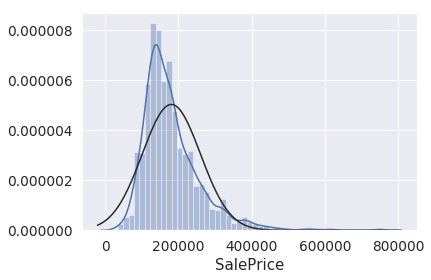

In [116]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

We take the log here because the error metric is between the log of the
SalePrice and the log of the predicted price. That does mean we need to 
exp() the prediction to get an actual sale price.

In [117]:
target = pd.DataFrame(index = train_processed.index, columns=["SalePrice"])
target["SalePrice"] = np.log(train["SalePrice"])
# train_processed.drop(["SalePrice"], axis=1, inplace=True)

print("Training set size:", train_processed.shape)
print("Test set size:", test_processed.shape)

Training set size: (1458, 403)
Test set size: (1459, 403)


Now we can see the following graph is normal and the probability plot reflects linearity.

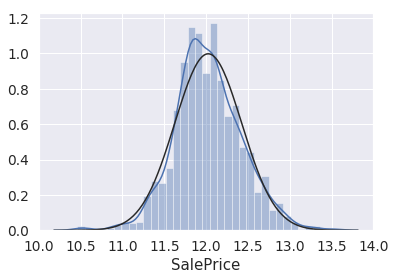

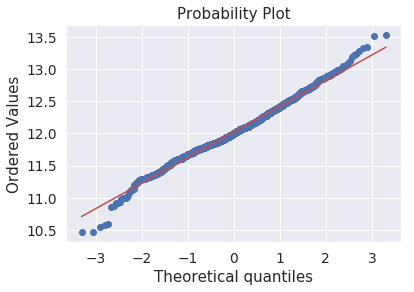

In [118]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(target['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(target['SalePrice'], plot=plt)

### Outlier Crosscheck

In this section we are checking again If any outlier remains after all the data processing. And the distribution plot will help us to realize the difference before and after normalization. Most of them became more close to normal distribution and less skewed after the processing. So we are not going to normalize them again.

***Before outlier-removal:***

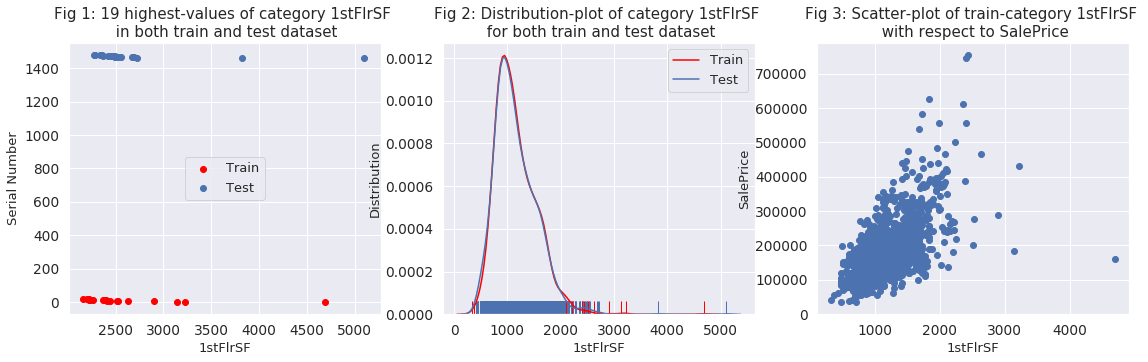

***After outlier-removal:***

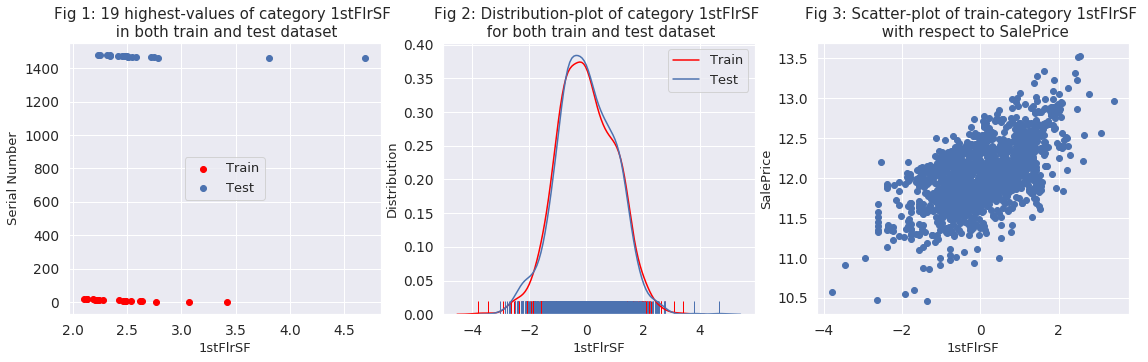

***Before outlier-removal:***

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


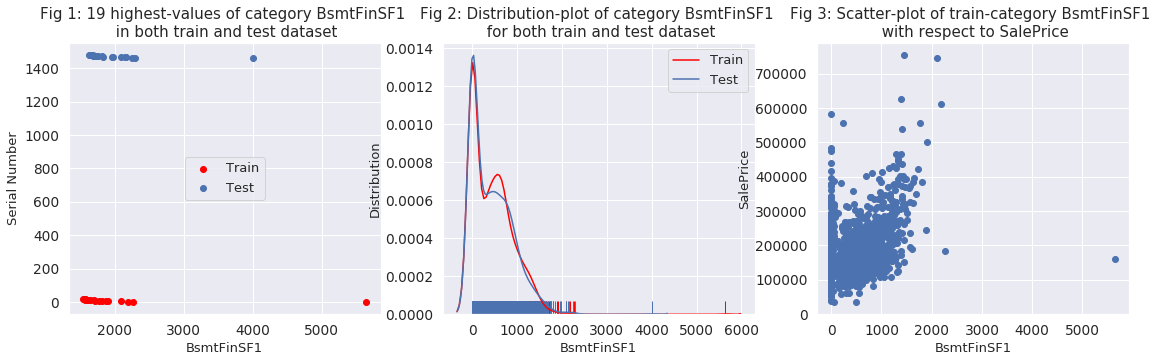

***After outlier-removal:***

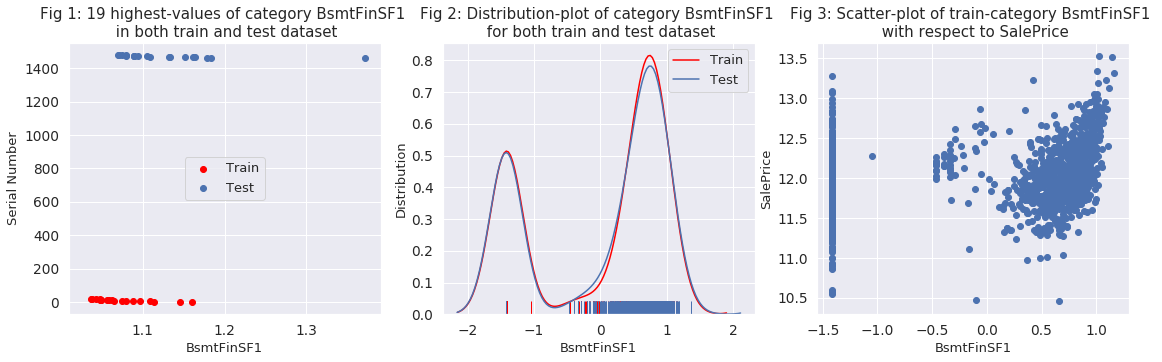

***Before outlier-removal:***

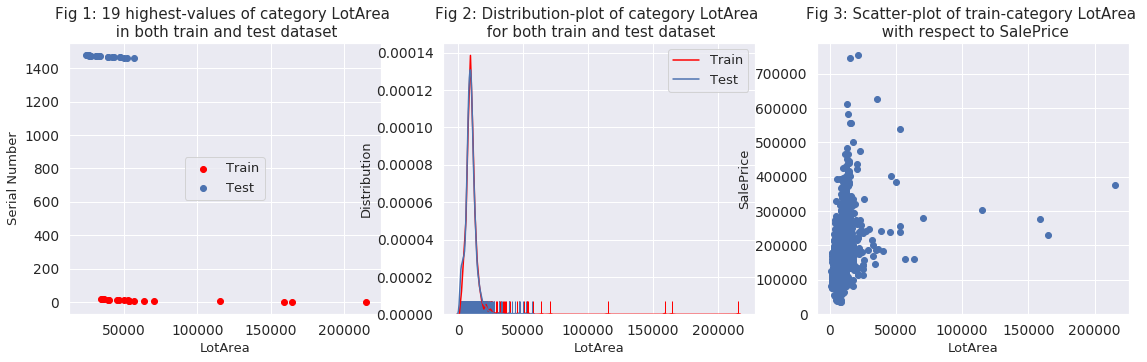

***After outlier-removal:***

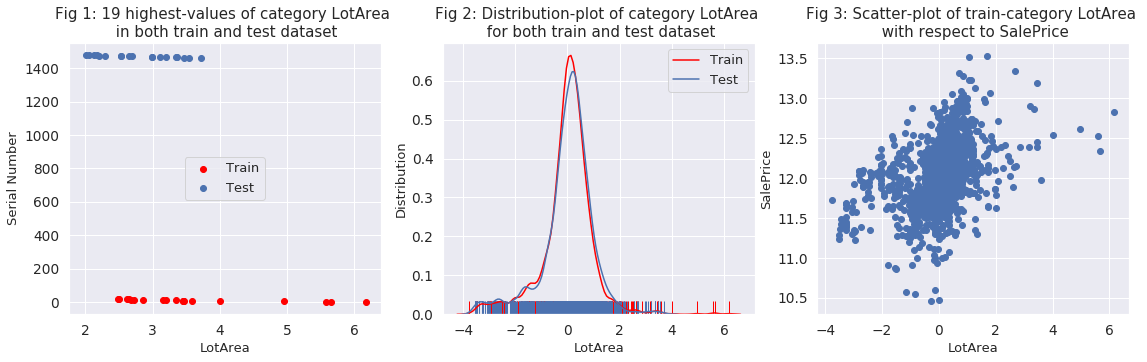

***Before outlier-removal:***

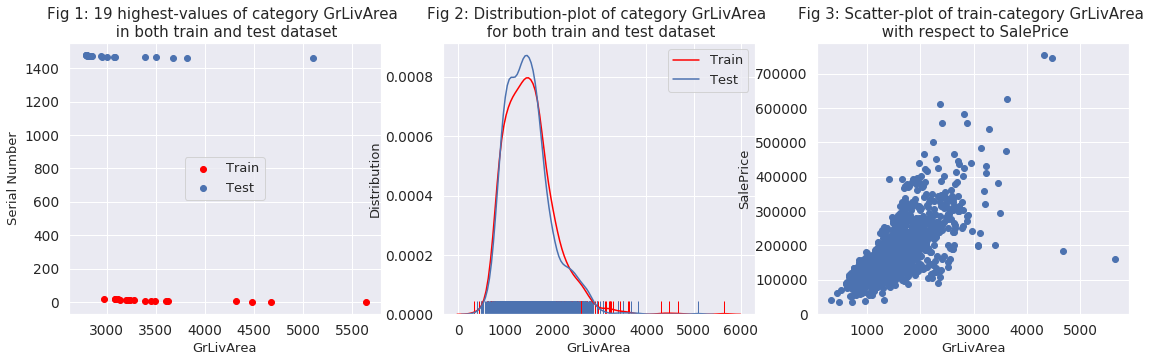

***After outlier-removal:***

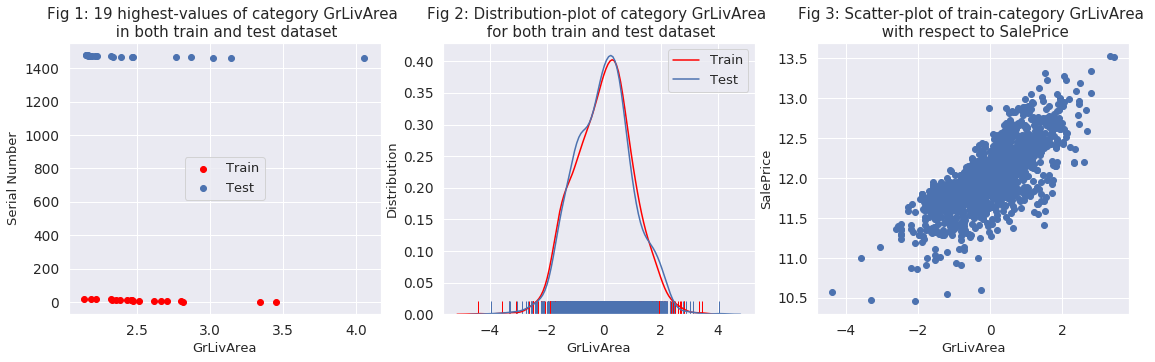

***Before outlier-removal:***

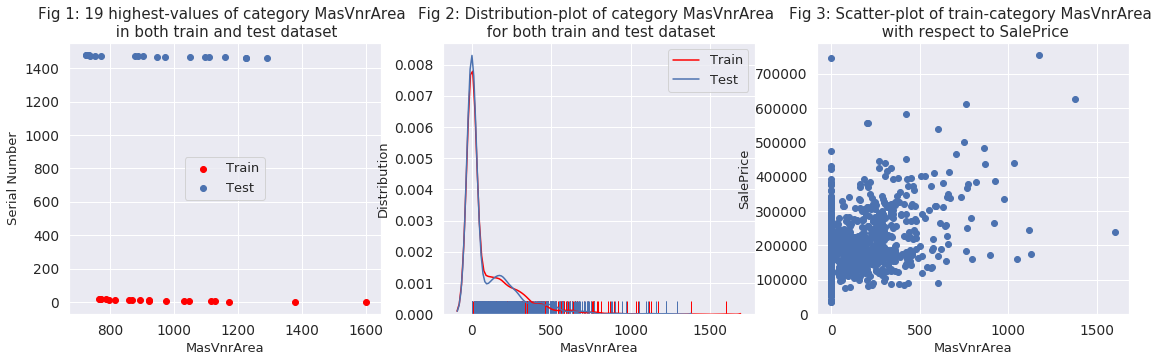

***After outlier-removal:***

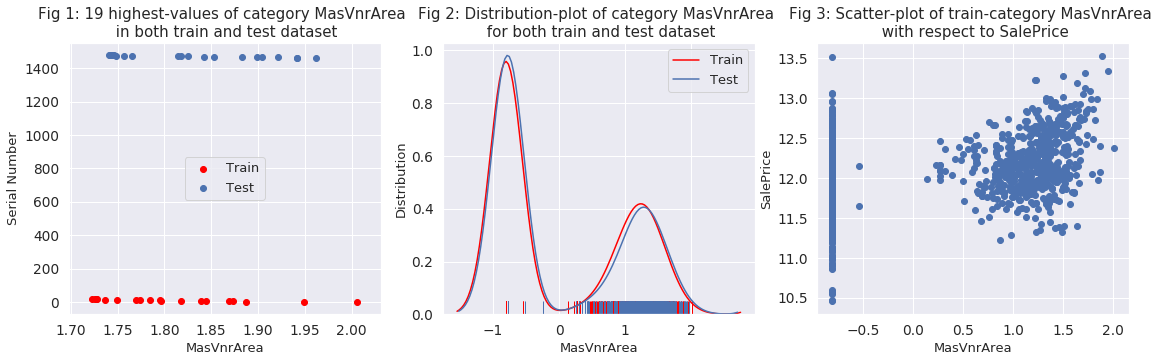

***Before outlier-removal:***

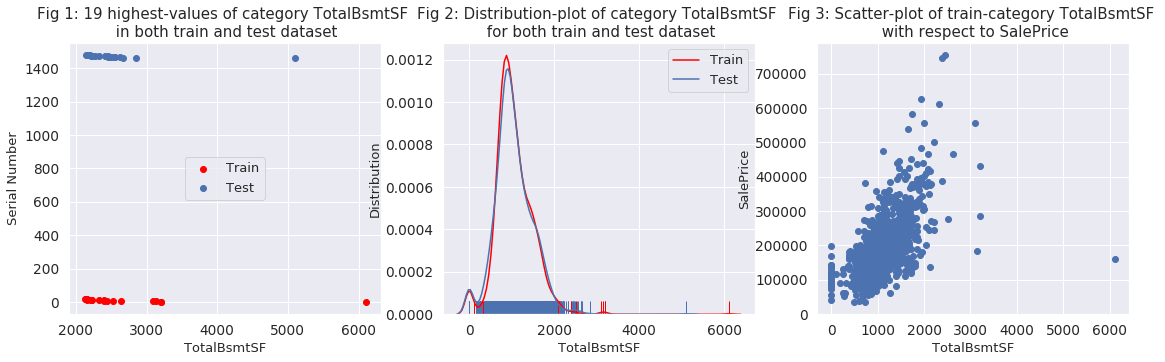

***After outlier-removal:***

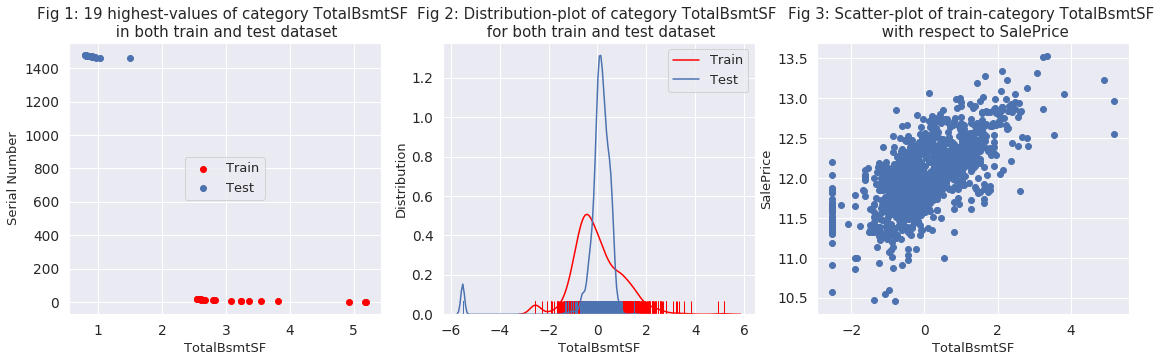

***Before outlier-removal:***

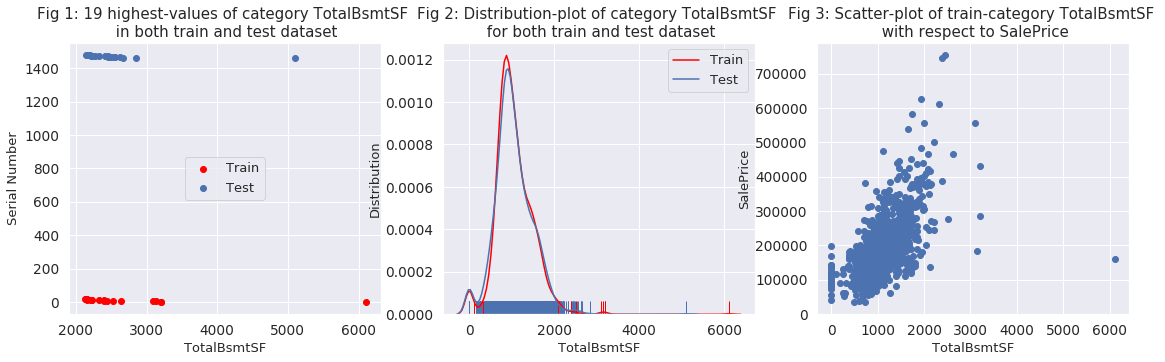

***After outlier-removal:***

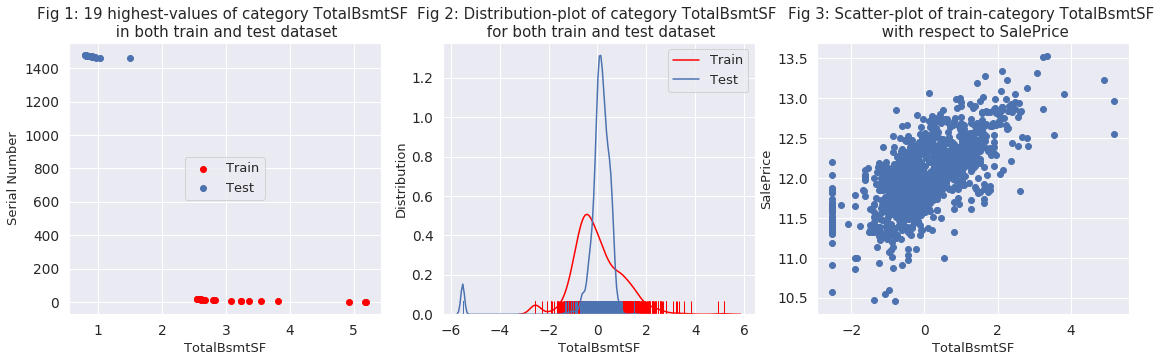

In [119]:
from IPython.display import Markdown, display
def printmdmd(string):
    display(Markdown("***"+string+"***"))
    
printmdmd('Before outlier-removal:')
outlier_check_plot('1stFlrSF',old_train_outlier_flag, old_test_outlier_flag, old_train_outlier_flag.SalePrice)
printmd('After outlier-removal:')
outlier_check_plot('1stFlrSF' , train_processed, test_processed, target)

printmd('Before outlier-removal:')
outlier_check_plot('BsmtFinSF1',old_train_outlier_flag, old_test_outlier_flag, old_target_outlier_flag)
printmd('After outlier-removal:')
outlier_check_plot('BsmtFinSF1', train_processed, test_processed, target)

printmd('Before outlier-removal:')
outlier_check_plot('LotArea',old_train_outlier_flag, old_test_outlier_flag, old_target_outlier_flag)
printmd('After outlier-removal:')
outlier_check_plot('LotArea', train_processed, test_processed, target)

printmd('Before outlier-removal:')
outlier_check_plot('GrLivArea',old_train_outlier_flag, old_test_outlier_flag, old_target_outlier_flag)
printmd('After outlier-removal:')
outlier_check_plot('GrLivArea', train_processed, test_processed, target)

printmd('Before outlier-removal:')
outlier_check_plot('MasVnrArea',old_train_outlier_flag, old_test_outlier_flag, old_target_outlier_flag)
printmd('After outlier-removal:')
outlier_check_plot('MasVnrArea', train_processed, test_processed, target)

printmd('Before outlier-removal:')
outlier_check_plot('TotalBsmtSF',old_train_outlier_flag, old_test_outlier_flag, old_target_outlier_flag)
printmd('After outlier-removal:')
outlier_check_plot('TotalBsmtSF', train_processed, test_processed, target)

printmd('Before outlier-removal:')
outlier_check_plot('TotalBsmtSF',old_train_outlier_flag, old_test_outlier_flag, old_target_outlier_flag)
printmd('After outlier-removal:')
outlier_check_plot('TotalBsmtSF', train_processed, test_processed, target)

Most of the scatterplot now seems that they have linear relationship with saleprice and the distribution graphs are less skewed and close to normal distribution. Finally due to standarization all of the features are now in same scale this will also help us to converge. 

This time we can see that the distribution improved a little bit due to log transformation and I was expecting that few outliers we observed earlier are no longer seems to be a outlier. Only the common outlier was the actual source of the problem. So we can now proceed to feed these data to our model.

## Corelation Matrix after procesing 

In [ ]:
abc = train_processed.copy()
abc['SalePrice'] = target


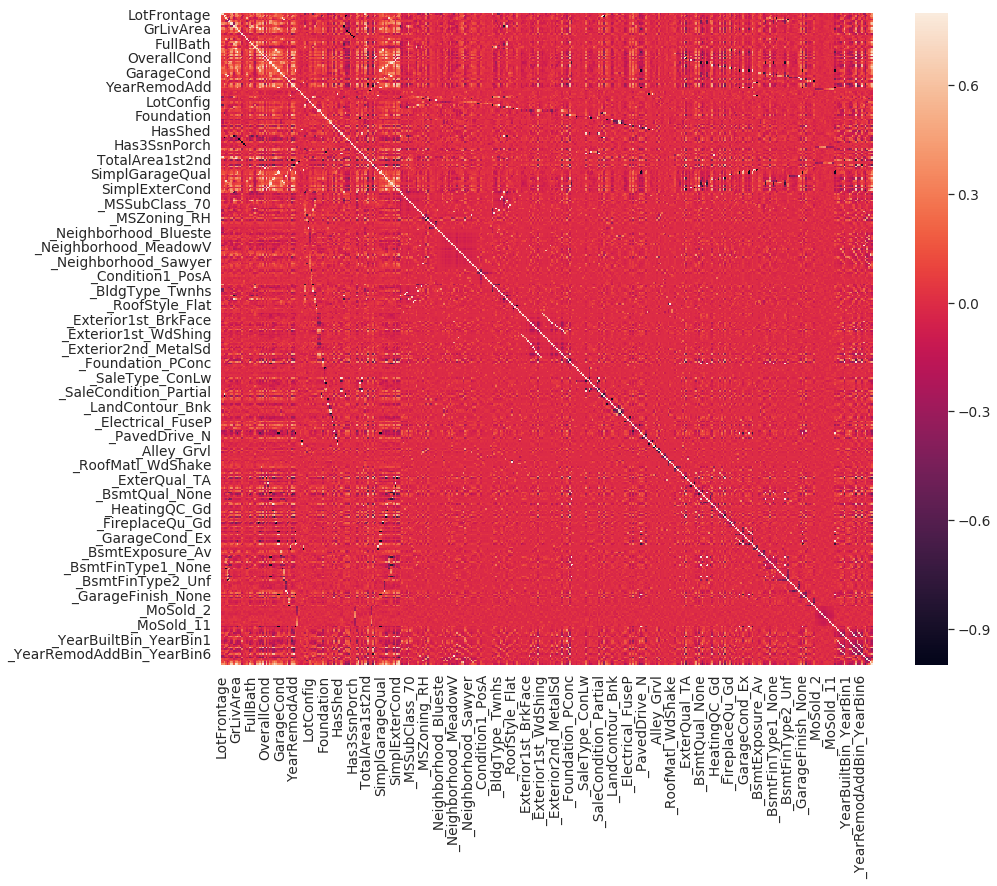

In [121]:
#correlation matrix
corrmat = abc.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, vmax=.8, square=True);

We can see that above graph is almost completely red that means no feature have any relation with another feature. That means all the features are now independent. So our data processing part should be good enough to get good results.

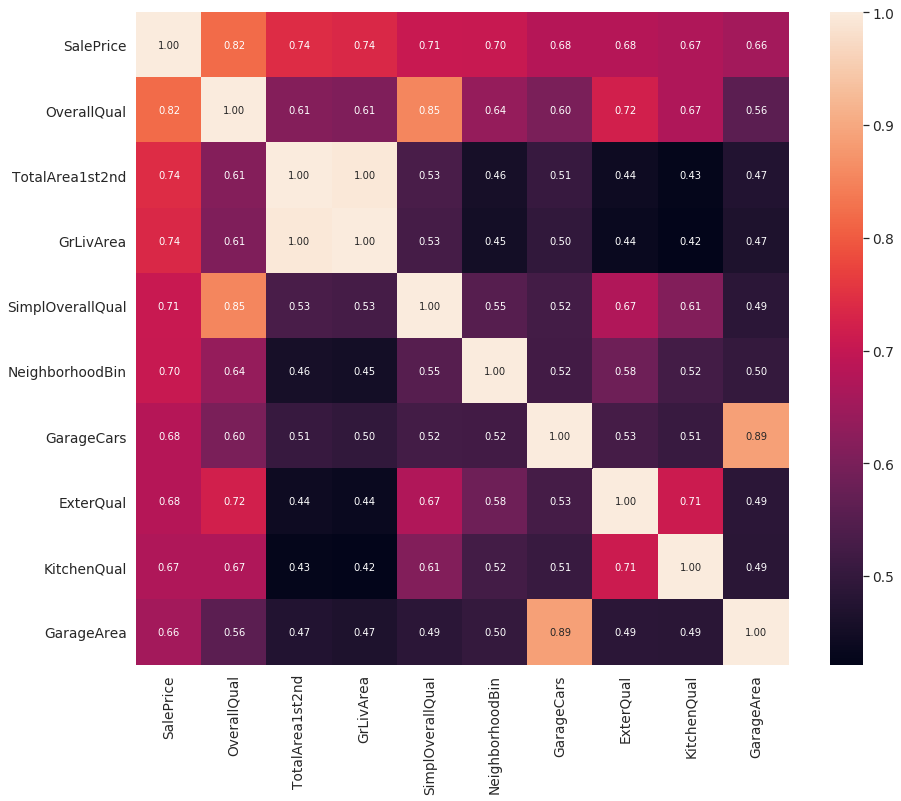

In [122]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(abc[cols].values.T)
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



We can see that GrLivArea and TotalArea1st2nd is actually same and in the following graph we will see that the graph is also same for both of the feature. So we can remove one of them.

The following 9 features are the most important feature for determining the SalePrice and they also don't have any outlier

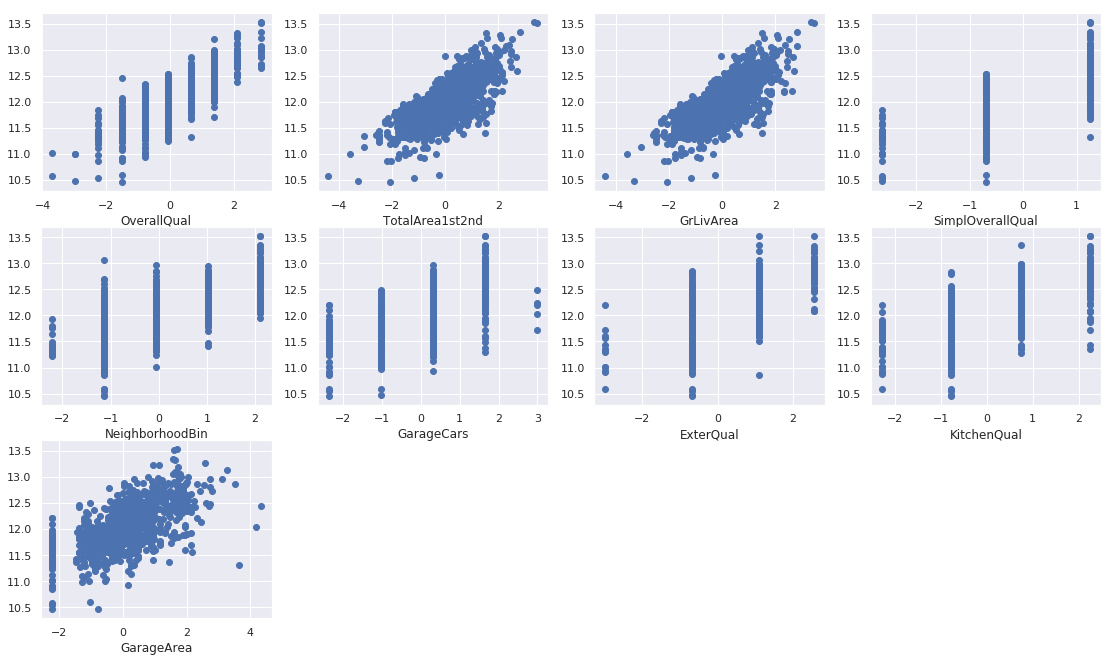

In [123]:
 # A FUNCTION TO SCATTER-PLOT ALL SELECTED FEATURES AGAINST SALEPRICE
def relation_with_SalePrice(c,column):
    plt.subplot(5, 4, c)
    plt.scatter(x = train_processed[column], y = target)
    plt.xlabel(column)
c=1
sns.set(font_scale=1)
plt.subplots(figsize=(19, 19))

if 'SalePrice' in cols:
    cols = cols.drop('SalePrice')

for item in cols:
    relation_with_SalePrice(c,item)
    c=c+1
plt.show()


**Dropping Features like GLivArea**

We can safely drop features that provides Correlation coefficient value= 1. If this happens we can just keep any one of them and remove the rest of them.

In the following section we are going to observe which features have coefficient value = 1 between them.We will only remove them because they will not decrease performance. 

In [124]:
abc = train_processed.copy()
# abc['SalePrice'] = target
abc.head()
correlation= abc.corr().unstack().sort_values(ascending=False)
# correlation=correlation.sort_values(ascending=False)
correlation[430:].head(20) #37


_Neighborhood_Crawfor   _Neighborhood_Crawfor     1.00000
_Neighborhood_CollgCr   _Neighborhood_CollgCr     1.00000
_Neighborhood_ClearCr   _Neighborhood_ClearCr     1.00000
_Neighborhood_BrkSide   _Neighborhood_BrkSide     1.00000
_Neighborhood_BrDale    _Neighborhood_BrDale      1.00000
_NeighborhoodBin_1      _NeighborhoodBin_1        1.00000
_Exterior2nd_Brk Cmn    _Exterior2nd_Brk Cmn      1.00000
LotFrontage             LotFrontage               1.00000
_NeighborhoodBin_3      _NeighborhoodBin_3        1.00000
IsRegularLotShape       _LotShape_Reg             1.00000
_LotShape_Reg           IsRegularLotShape         1.00000
BoughtOffPlan           _SaleCondition_Partial    1.00000
_SaleCondition_Partial  BoughtOffPlan             1.00000
IsGarageDetached        _GarageType_Detchd        1.00000
_GarageType_Detchd      IsGarageDetached          1.00000
IsLandLevel             _LandContour_Lvl          1.00000
_LandContour_Lvl        IsLandLevel               1.00000
_PavedDrive_Y 

In [125]:
if 'GrLivArea' in train_processed.columns and 'GrLivArea' in test_processed.columns:
    train_processed = train_processed.drop(columns='GrLivArea')
    test_processed = test_processed.drop(columns='GrLivArea')
    
    train_processed = train_processed.drop(
        columns=['IsRegularLotShape','BoughtOffPlan','IsGarageDetached','IsLandLevel','_PavedDrive_Y'])
    test_processed = test_processed.drop(
        columns=['IsRegularLotShape','BoughtOffPlan','IsGarageDetached','IsLandLevel','_PavedDrive_Y'])


Finally we have removed the following features because they coefficient value = 1 with another feature. 
Removed features are: 

- 'IsRegularLotShape'
- 'BoughtOffPlan'
- 'IsGarageDetached'
- 'IsLandLevel'
- '_PavedDrive_Y'
- 'GrLivArea'

# Split Data for training and testing


In this Section We have split the training dataset into two part. First one is called train and other is called val (means validation set).Training set contains X_train and y_train.Validation set also contains X_val and y_val. X means this SalePrice  is excluded. Again Y means this portion only contains Saleprice. I have used 80-20 split where training contains 80% data and validation contains 20% data. I have used kaggle testing set for testing them (variable name is test_processed) and the result of the kaggle testing is also included as a screenshot after accuracy section.

In [126]:
X_train, X_val, y_train, y_val = train_test_split(train_processed, 
                                                    target,
#                                                     train_size = 0.99, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    shuffle = True
                                                   )



Following section changes the training set to 100% when we set submit=True. The reason behind it is when we train with full dataset then we use to get better accuracy. But we will set that True only when we are going to submit the prediction of the tess_proceed to kaggle.

In [127]:
prediction_dict = dict()
submit_prediction_dict = dict()

submit = False
save_score = False

if submit :
    X_train = train_processed
    y_train = target
else:
    X_train = X_train
    y_train = y_train 

# Testing different models

### RMSE
Following function calculates root mean squire error

**What is RMSE ?**

The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. These deviations are called residuals when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample. The RMSD serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power. RMSD is a measure of accuracy, to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent.[1]

In [128]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Random Forest Regressor
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [129]:
my_model = RandomForestRegressor(n_estimators=500,n_jobs=-1)


my_model.fit(X_train, y_train)
prediction = my_model.predict(X_val)
if submit:
    submit_prediction = my_model.predict(test_processed)
    submit_prediction_dict['Random Forest Regressor'] = submit_prediction

prediction_dict['Random Forest Regressor'] = prediction

print('root mean absolute error: ',rmse(y_val, prediction))
print('accuracy score: ',  r2_score(np.array(y_val),prediction) )

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


root mean absolute error:  0.12333514318294307
accuracy score:  0.9102428268390197


### DecisionTree
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [130]:
from sklearn.tree import DecisionTreeRegressor
my_model = DecisionTreeRegressor()

my_model.fit(X_train, y_train)
prediction = my_model.predict(X_val)
prediction_dict['DecisionTree'] = prediction
if submit:
    submit_prediction = my_model.predict(test_processed)
    submit_prediction_dict['DecisionTree'] = submit_prediction

print('root mean absolute error: ',rmse(y_val, prediction))
print('accuracy score: ',  r2_score(np.array(y_val),prediction) )

root mean absolute error:  0.2070903796053185
accuracy score:  0.7469447626888546


### Xgboost 
XGBoost stands for eXtreme Gradient Boosting. It is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

In [131]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=500, learning_rate=0.05)

my_model.fit(X_train, y_train)
prediction = my_model.predict(X_val)
prediction_dict['Xgboost'] = prediction

if submit:
    submit_prediction = my_model.predict(test_processed)
    submit_prediction_dict['Xgboost'] = submit_prediction
    

print('root mean absolute error: ',rmse(y_val, prediction))
print('accuracy score: ',  r2_score(np.array(y_val),prediction) )

root mean absolute error:  0.10758602616026638
accuracy score:  0.9317021213275157


## Lasso
Lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.Lasso was originally formulated for least squares models and this simple case reveals a substantial amount about the behavior of the estimator, including its relationship to ridge regression and best subset selection and the connections between lasso coefficient estimates and so-called soft thresholding. It also reveals that (like standard linear regression) the coefficient estimates need not be unique if covariates are collinear.


In [132]:
from sklearn.linear_model import Lasso
my_model = Lasso(alpha=5e-3, max_iter=50000)


my_model.fit(X_train, y_train)
prediction = my_model.predict(X_val)
prediction_dict['Lasso'] = prediction

if submit:
    submit_prediction = my_model.predict(test_processed)
    submit_prediction_dict['Lasso'] = submit_prediction
    
print(' root mean absolute error: ',rmse(y_val, prediction))
print('accuracy score: ',  r2_score(np.array(y_val),prediction) )

 root mean absolute error:  0.10782602106751343
accuracy score:  0.9313970738094619


In the above model alpha is Constant that multiplies the L1 term. For numerical reason we cant set alpha to 0 but keeping alpha low provides good accuracy for out dataset. I have found 5e-4 provides good accuracy.

for 5e-5: 
 root mean absolute error:  0.10973737757187135
accuracy score:  0.9289433650407954

for 1e-5: 
 root mean absolute error:  0.11426822609093419
accuracy score:  0.9229546464396043

for 1e-3: 
root mean absolute error:  0.10466883446067998
accuracy score:  0.9353556969018821


for 1e-4: 
root mean absolute error:  0.10658498063306822
accuracy score:  0.9329671780226085

for 5e-3: 
root mean absolute error:  0.10794617678311977
accuracy score:  0.9312440935471524

# ANN

### Theory and Basics:  
An Artificial Neurol Network (ANN) is a computational model. It is based on the structure and functions of biological neural networks. It works like the way human brain processes information. ANN includes a large number of connected processing units that work together to process information. They also generate meaningful results from it.

An artificial neuron is a mathematical function conceived as a model of biological neurons, a neural network. Usually each input is separately weighted, and the sum is passed through a non-linear function known as an activation function or transfer function.

The artificial Neural network is typically organized in layers. Layers are being made up of many interconnected ‘nodes’ which contain an ‘activation function’. A neural network may contain the following 3 layers:

- <b> Input layer </b> The purpose of the input layer is to receive as input the values of the explanatory attributes for each observation. Usually, the number of input nodes in an input layer is equal to the number of explanatory variables. ‘input layer’ presents the patterns to the network, which communicates to one or more ‘hidden layers’. The nodes of the input layer are passive, meaning they do not change the data. They receive a single value on their input and duplicate the value to their many outputs. From the input layer, it duplicates each value and sent to all the hidden nodes.
- <b> Hidden Layer </b> The Hidden layers apply given transformations to the input values inside the network. In this, incoming arcs that go from other hidden nodes or from input nodes connected to each node. It connects with outgoing arcs to output nodes or to other hidden nodes. In hidden layer, the actual processing is done via a system of weighted ‘connections’. There may be one or more hidden layers. The values entering a hidden node multiplied by weights, a set of predetermined numbers stored in the program. The weighted inputs are then added to produce a single number.
- <b> Output layer </b> The hidden layers then link to an ‘output layer‘. Output layer receives connections from hidden layers or from input layer. It returns an output value that corresponds to the prediction of the response variable. In classification problems, there is usually only one output node. The active nodes of the output layer combine and change the data to produce the output values.


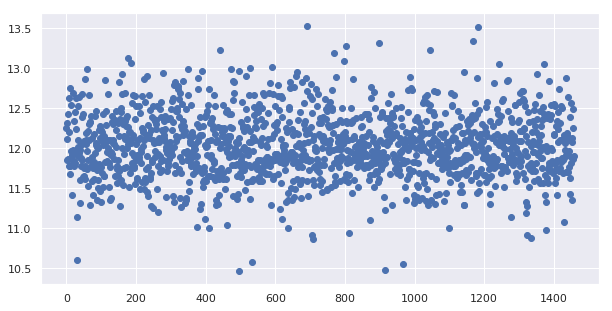

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
plt.scatter(range(len(train)),list(target.SalePrice.values))
plt.show()
plt.figure(figsize=[10,5])
sns.kdeplot(target.SalePrice, shade= True)
plt.show()

In the above graph we can see that the price range is in a normal distribution. If we provide tf.random.normal while initializing the weight it should be more helpful for training. And this initialization should provide better validation with low amount of epoches. In my kaggle score rmse 0.123 is found through random normal while uniform distribution provided rmse 0.127 score. Again Uniform distribution takes 3 times more epoches to reach rmse score 0.127. But for uniform distribution no improvement cant found after 16000 epoch and for normal distribution no improvement can't found after 6000 epoch.

#### Target
By observing the span of the data and the data distribution we can conclude that logistic regression should perform well for this kind of problem. So we can safely say that starting with single neuron in a single hidden layer should perform well and we should look for simpler solution. Again from theoretical perspective single neurone and single layer ANN is nothing but a logistic regression and after adding layers and neurons we can regularize them so that they behave more like a logistic regression model and then we can tune parameter such a way so that it can handle little bit more complexity than a logistic regression. Finally my target is to make sure that it performs well as a logistic regression model and then improve it with more neuron/layers and proper tuning of parameters.

In [216]:
# log_df = pd.DataFrame(columns=['learning_rate', 'num_steps', 'beta1','beta2','beta3', 'hidden_1' , 'hidden_2', 'hidden_3','input_dim' , 'test_rmse_score', 'test_r2_score'])
# log_df.to_csv("diffrent_training_results.csv", index=False)

### Ann parameters 

#### **Variables**
A brief explanation of the variables used is given below. Some terminologies are explained in more detail when their usage comes up.

**learning_rate:** On a intuition level, learning rate means how fast the network will learn something new and discard the old one. On a technical level, learning rate determines how fast the **'weights'** will be updated. Learning rate should be high enough so that it won’t take too long to converge, and it should be low enough so that it is able to find the  minima.

**epoch:** The number of times the model will be trained. After each run, the **'weights'** will be updated by the means of **'optimizer'**

**beta1/2/3 :** These variables control how much penalty to add to the model's loss function. 

**hidden_1/2/3 =**  Determines how many neurons a layer has. The number after the **'hidden_'** part denotes the layer number. i.e. 2 means second hidden layer

**input_dim:** Determines the shape of the input matrix. The input size is the same as the number of features the dataset has.

**output_dim:** Determines the shape of the final output. As this is a regression problem the ouput is of size **one**.

**X_tf/y_tf:** These two are tensorflow placeholder variables. They take input during the training period.

**loss** for loss function I have used mean squared error.

The following ANN is build with 3 hidden layers. Output dimention is 1 because its a regration problem.

In [217]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 8000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.0
beta3 = 0.0
beta4 = None

hidden_1 = 16
hidden_2 = 8
hidden_3 = 4
hidden_4 = None



# minimum_validation_loss is to control model saving locally
minimum_validation_loss = 0.0190000

input_dim = X_train.shape[1]  # Number of features
output_dim = 1              # Because it is a regression problem
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )



### Weight and Bias

A weight decides how much influence the input will have on the output. A weight represent the strength of the connection between units. When a value arrives at a neuron, the value gets multiplied by a weight value.  

Bias is an extra input to neurons and has it’s own connection weight. But a bias node is not connected to any node in the previous layer, only connected to the next layer. This makes sure that even when all the inputs are none (all 0’s) there’s gonna be an activation in the neuron.

Here I have initialized the  "weight" and "bias" variables as "random normal", which takes some random values from a normal distribution to use. Now there is also the option to set them all to "zero". But there is a problem to that. If all of the weights are the same, they will all have the same error and the model will not learn anything - there is no source of asymmetry between the neurons.That's why the better method is to keep the weights very close to zero but make them different by initializing them to small, non-zero numbers. With default parameters, "random normal" chooses values from a nomal distribution whose mean is 0 (zero) and has a standard deviation of 1 (one).



In [218]:
weights = {
    'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
    'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),
    'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])),
    'out': tf.Variable(tf.random_normal([hidden_3, output_dim]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([hidden_1])),
    'b2': tf.Variable(tf.random_normal([hidden_2])),
    'b3': tf.Variable(tf.random_normal([hidden_3])),
    'out': tf.Variable(tf.random_normal([output_dim]))
}

## Model

The following block of code is what the actual ANN model looks like. Each layer, a matrix multiplication happens and then the layer is activated by a activation function. The final output layer does not have any activation function because we are performing a regression a here.

Here, the activation function is our main concern. Currently the most popular types of Activation functions are as follows:
* Sigmoid
* Tanh  -  Hyperbolic tangent
* ReLu - Rectified linear units

**"Sigmoid"** activation function is mathematically represented by this equation,f(x) = 1 / 1 + exp(-x) . Its output range is between 0 to 1 and it has an S - shaped curve. It is easy to understand and apply but it has "vanishing gradient" problem as well as being slow to converg. So, I have avoided using it.

"**Tanh**" activation function is mathematically represented by this equation,f(x) = 1 -  exp(-2x) / 1 + exp(-2x). It’s output range is in between -1 to 1 i.e -1 < output < 1 . As such optimization is easier in this method but still it suffers from Vanishing gradient problem.

"**ReLu**" is a very popular currently due to its simplicity and ease of use. Mathematically, ReLu can be defined as follows- 

R(x) = max(0,x) i.e if x < 0 , R(x) = 0 and if x >= 0 , R(x) = x. 

From the mathamatical function it can be seen that it is very simple and efficinent. It also avoids and rectifies vanishing gradient problem . It is also relatively easier to optimize. 

In the dataset Sales price are non negative number so our model is expected to return positive values so as a activation function I have used relu as it gives positive values. Again relu is easy to optimize because they are similar to linear units. The only difference is that a rectified linear unit outputs zero across half its domain. Thus derivatives through a rectified linear unit remain large whenever the unit is activate. The gradients are not only large but also consistent. 

In [219]:
def ann_model(X_input):
  # Hidden layers
    layer_1 = tf.add(tf.matmul(X_input, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    
    # Output layer
    layer_out = tf.matmul(layer_3, weights['out']) + biases['out']

    return layer_out

For optimization I have used Adam optimizer. Adam derives from phrase “adaptive moments”. Its a varient of RMSProp. I have used adam instead of RMSProp for couple of reasons. First, in Adam, momentum is incorporated directly as an estimate of the ﬁrst-order moment (with exponential weighting) of the gradient. The most straightforward way to add momentum to RMSProp is to apply momentum to the rescaled gradients. The use of momentum in combination with rescaling does not have a clear theoretical motivation. Second, Adam includes bias corrections to the estimates of both the ﬁrst-order moments (the momentumterm) and the (uncentered) second-order moments to account for their initializationat the origin. RMSProp also incorporates an estimate of the (uncentered) second-order moment; however, it lacks the correction factor. Thus,unlike in Adam, the RMSProp second-order moment estimate may have high bias early in training. Adam is generally regarded as being fairly robust to the choice of hyperparameters, though the learning rate sometimes needs to be changed from the suggested default. Usually default rate is .001 but for our case I have used 0.1 as it gives better optimization results. 

Following segment is actually initializing different parameters. From the dataset we can see that the estimation of sale price is a regression problem and neural network used here was overfitting most of the time due to higher variance. So for making it simpler I have penalized weight matrix of hidden layers with l2 regularization. Again I have found that single hidden layer with single neuron performs well and that means the prediction model don't need to be too complex. Thus I became ensured that regularization is going to improve performance.

In [220]:
# Model Construct
model = ann_model(X_tf)

# Mean Squared Error function
# loss = tf.reduce_mean(tf.square(y_tf - model))
loss = tf.losses.mean_squared_error(y_tf , model , reduction=tf.losses.Reduction.SUM_BY_NONZERO_WEIGHTS)

# loss = tf.square(y_tf - model)
regularizer_1 = tf.nn.l2_loss(weights['w1'])
regularizer_2 = tf.nn.l2_loss(weights['w2'])
regularizer_3 = tf.nn.l2_loss(weights['w3'])
loss = tf.reduce_mean(loss + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3)
# loss = loss + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3

# Adam optimizer will update weights and biases after each step
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


# Initialize variables 
init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()


## Training

The **training_block()** is the function where all the work finally happens. The constructed model gets the training data and the training process begins. In each epoch the code is calculating the loss function and trying to minimize that value. Training loss and validation loss of each epoch gets stored in **train_loss** and **val_loss** respectively. After each 50 epochs the current loss values are added to two lists **train_LC** and **val_LC**, which is used to plot the learning curve after the training is finished. Also after each 500 epochs, I have printed the **Training loss and validation loss.**

During the training phase, I have run a shuffle function on the input data. This is so that when the data is input into the model, there are some variation to the serial the data gets inside the model. The reason why i have done it is so that it can have the effect of training on mini batches. 

In [221]:
train_LC = []
val_LC = []
# session_var = None

Above train LC and val Lc variable keeps track of the learning rate so that learning curve can be drwan. In the following training block I have shuffled the training data in each epoch. This helps to reduce the loss difference of the validation and training. Thus it reduces the chance for over-fitting and under-fitting.

In [222]:

def training_block(X_train,y_train, X_val,y_val):
    #reseting variables
    session_var = None
    save_path = None
    with tf.Session() as sess:
        
        #running initializer
        sess.run(init)
        
#         minimum_validation_loss = 0.0190000

        global minimum_validation_loss
        for i in range(num_steps):
            if submit :
                X_train , y_train = shuffle(train_processed,target )
            else:
                X_train,y_train = shuffle(X_train,y_train )
                
            sess.run(optimizer, feed_dict={X_tf:X_train, y_tf:y_train})
            train_loss = sess.run(loss, feed_dict={X_tf:X_train, y_tf:y_train})
            val_loss = sess.run(loss, feed_dict={X_tf:X_val, y_tf:y_val}) 
            if submit :
                new_minimum_validation_loss = np.min(train_loss)
            else:
                new_minimum_validation_loss = np.min(val_loss)

#             if (i+1)%50 == 0:
            train_LC.append(train_loss)
            val_LC.append(val_loss)

            if (i+1)%500 == 0:
                print("epoch no : ",i+1, "  training loss: ",train_loss, "  validation loss: ", val_loss, "    minimum_validation_loss" , minimum_validation_loss)

            if new_minimum_validation_loss  < minimum_validation_loss :
                minimum_validation_loss = new_minimum_validation_loss
#                 global session_var
#                 session_var = sess
#                 Save the variables to disk.
                save_path = saver.save(sess, "model/model.ckpt")
                

        if bool(save_path):
            sess.close()
            print("Model saved in path: %s" % save_path)



training_block(X_train,y_train, X_val,y_val)

epoch no :  500   training loss:  56.5054   validation loss:  56.768776     minimum_validation_loss 0.019
epoch no :  1000   training loss:  18.997467   validation loss:  19.050062     minimum_validation_loss 0.019
epoch no :  1500   training loss:  7.6135345   validation loss:  7.6308985     minimum_validation_loss 0.019
epoch no :  2000   training loss:  3.145926   validation loss:  3.16356     minimum_validation_loss 0.019
epoch no :  2500   training loss:  1.3152529   validation loss:  1.3331934     minimum_validation_loss 0.019
epoch no :  3000   training loss:  0.5823516   validation loss:  0.6023922     minimum_validation_loss 0.019
epoch no :  3500   training loss:  0.29742134   validation loss:  0.31798798     minimum_validation_loss 0.019
epoch no :  4000   training loss:  0.17566855   validation loss:  0.19880897     minimum_validation_loss 0.019
epoch no :  4500   training loss:  0.039279543   validation loss:  0.05171471     minimum_validation_loss 0.019
epoch no :  5000  

### Grid search on epoch:
In the above block I have saved the model when validation loss is lowest. To do that I have kept another parameter called minimum_validation_loss. When validation loss reach lower I save the model, update minimum_validation_loss and continue running it. If it finds another lower validation loss it saves the model again and update minimum_validation_loss. Thus when I get the lowest validation loss my model saves again and that is the most optimum result. But when I run using all the data to predict kaggle test dataset then I use training loss to do the same.

As I mentioned earlier the epoch to reach the best validation accuracy is not fixed. Rather we can find it in 3 different range of epoch. The reason behind this is mostly because of random initializing of the weight and if we have fixed the seed value then it might change into only one single epoch range. But doing so we loose chance to improve our model further. Again if we want to ensemble different ANN model it woun't help when we use same seed and state. I have tried 1000+ parameters and combination from the start and used graph to visualize how to improve that but with grid search I might not get the exact idea why certain things provide good results or not and looking into every search result and graph is also too much so applying on the epoch seems to me more reasonable solution because the epoch for best validation result will be different in every run.

#### Trick
I have shuffled the data in every epoch and this trick improved the validation accuracy. On the other hand I did't use batch because according to my previous experience this kind of logistic regression problem works better when its given as a whole set rather than batch or mini-batch. But if its overfitting then passing the data in a batch / mini-batch would perform better as it helps to generalize more. We can say its more like a dropout effect. And I have tried to do dropout to reduce distance of training and validation accuracy but that didn't worked well.

In [223]:
def Prediction_block(X_val):
    with tf.Session() as sess:
        try:
            # Restore variables from disk.
            saver.restore(sess, "model/model.ckpt")
            print("Model restored.")
        except:
            print("------------ available checkpoint is for different model --------------")
            return 
        # Check the values of the variables
        pred =  sess.run(model, feed_dict={X_tf: X_val})
        prediction = pred.squeeze()
        sess.close()
        return prediction
    #     print(np.exp(prediction))
    
prediction = Prediction_block(X_val)

pred_str = 'ANN_base_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction

INFO:tensorflow:Restoring parameters from model/model.ckpt
Model restored.


## Learning curve

 Following variables are only used to zoom into the graph
- start_observation_flag = starts point to zoom in
- end_observation_flag = end point to zoom in

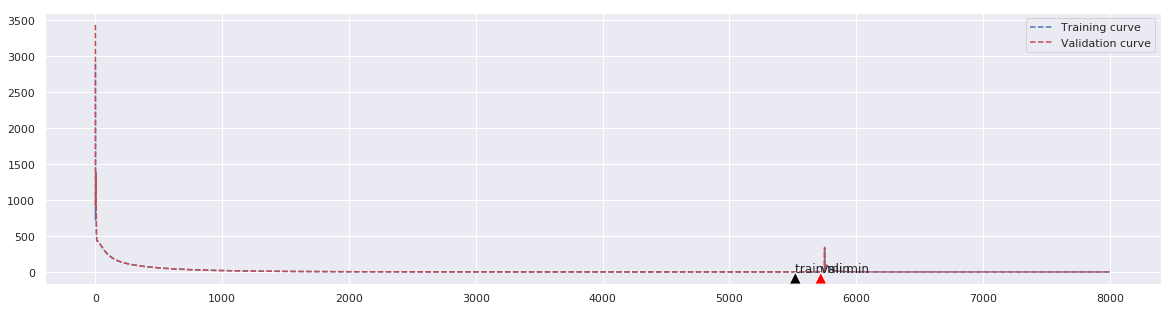

If we zoom into the curve we would have seen the following


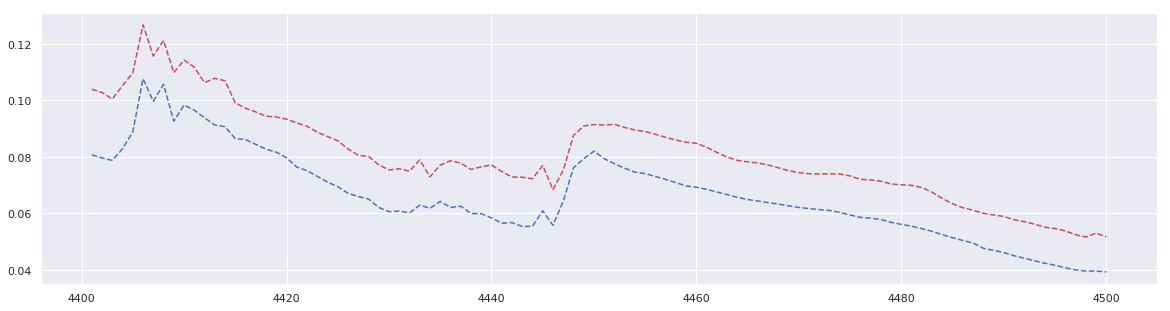

In [228]:
def learning_curve(start_observation_flag,end_observation_flag):
    xdata = list(range(1,len(train_LC)+1))
    minimum = min(train_LC)

    plt.figure(figsize=[20,5])
    plt.plot(xdata, train_LC, 'b--', label='Training curve')
    plt.annotate('train min', xy=(xdata[train_LC.index(minimum)], minimum),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    minimum = min(val_LC)
    plt.plot(xdata, val_LC, 'r--' , label='Validation curve')
    plt.annotate('vali min', xy=(xdata[val_LC.index(minimum)], minimum),
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.legend()
    plt.show()
    
    print("If we zoom into the curve we would have seen the following")

    plt.figure(figsize=[20,5])
    plt.plot(xdata[start_observation_flag:end_observation_flag], train_LC[start_observation_flag:end_observation_flag], 'b--')
    plt.plot(xdata[start_observation_flag:end_observation_flag], val_LC[start_observation_flag:end_observation_flag],'r--')
    
    plt.show()

#Following variables are only used to zoom into the graph
start_observation_flag = 4400
end_observation_flag = 4500
learning_curve(start_observation_flag,end_observation_flag)

Both of the curve actually seems to be on top of each other.The reason is:
-  I have applied log transformation on the SalePrice and I have also transformed all my numerical data thats why the difference between the training loss and validation loss seems to be very small and very stable.
- For loss function I have used Mean Squared Error (MSE). For reducing MSE I have used SUM_BY_NONZERO_WEIGHTS which divided scalar sum  by number of non-zero weights. MSE calculates squared error for all the data and then calculate the mean. Now, all my SalePrice is very small due to normalization (between 10 to 13.5). Where mean of saleprice is 12.02 . Suppose in nth epoch if
    - for training loss
        - a saleprice is 11.5 and prediction is 12  Squred error .25
        - another saleprice is 13 and prediction is 12  Squred error 1
        - another saleprice is 12.5 and prediction is 12 Squred error .25
        - another saleprice is 11.5 and prediction is 12 Squred error .25
        - another saleprice is 10.3 and prediction is 12 Squred error 1.7
        
      **MSE = (.25+1+.25+.25+1.7)/5 = .69**
    - for validation loss
        - another saleprice is 12.9 and prediction is 12 Squred error .81
        - another saleprice is 13.3 and prediction is 12 Squred error 1.69
        - another saleprice is 10.8 and prediction is 12 Squred error 1.44
        - another saleprice is 11.3 and prediction is 12 Squred error .49
        - another saleprice is 11.8 and prediction is 12 Squred error .04
        
      **MSE = (.81+1.69+1.44+.49+.04)/5 = .894**
      
      **Difference between validation loss and training loss is .204**
      
    Usually in regression problem neural network stats to predicts the average value within 5-20 epoch so very quickly the difference between val_loss and training_loss gets much lower. In our dummy example difference is already .204 and if its epoch no is 10, by the time it reaches to 500 epoch the difference could go as low as 10^-4.

## Acuracy Score

In [225]:
def accuracy(y_val,prediction):
    test_rmse_score = rmse(y_val, prediction)
    test_r2_score =  r2_score(np.array(y_val),prediction)
    return test_rmse_score, test_r2_score

test_rmse_score, test_r2_score = accuracy(y_val,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )

ann root mean absolute error:  0.11048149815328126
accuracy score:  0.9279764388154309


### kaggle rmse: 
In kaggle ranking the above ANN model provides the best rmse score and the score is 0.12324

## Description on Learning curve and Accuracy:

We can observe where overfitting occurs. Overfitting actually occurs if the training
loss goes under the validation loss even though the validation is still dropping. It is
the sign that network is learning the patterns in the train set that are not applicable in
the validation done. In a short note we can say::
 <p> Overfitting : training loss << validation loss </p>
 <p> Underfitting : training loss >> validation loss</p>
 <p> Just right : training loss ~ validation loss </p>
 
According to this theory our both learning curve is exactly top of one another so in our case validation loss and training loss is almost same so we can say that our model is doing just the right thing. Again In validation score .1054 is impressive compared to other models.

## Save score

In [144]:
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

# Cross validation

When we perform a random train-test split of our data, we assume that our examples are independent. That means that by knowing/seeing some instance will not help us understand other instances. However, that’s not always the case. So to make sure if the Data is actually independent, to get more metrics and to use fine tuning my parameters on whole dataset I am performing cross validation.

In [ ]:


from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
kf = KFold(n_splits=10, shuffle=True)

kf_rmse_list = []
kf_r2_list = []

# train_processed['SalePrice'] = target.values
for train_index, test_index in kf.split(train_processed):
    X_train, X_val = train_processed.iloc[train_index] , train_processed.iloc[test_index]
    y_train, y_val = target.iloc[train_index], target.iloc[test_index]
    
    training_block(X_train,y_train, X_val,y_val)
    prediction = Prediction_block(X_val)
    test_rmse_score, test_r2_score = accuracy(y_val, prediction)
    
    kf_rmse_list.append(test_rmse_score)
    kf_r2_list.append(test_r2_score)
    
    print("r2 list print", kf_r2_list)
    print('rmse list print',kf_rmse_list)

print("r2 mean print", np.mean(kf_r2_list))
print('rmse mean print', np.mean(kf_rmse_list))

### Observation
In the cross validation section we can see that 10 fold cross validation on our best ANN model provides similar rmse to 80-20 split rmse score. So we can relay on 80-20 split on this dataset. Thus we can say that the data in the dataset is independent.

# Observing Few Other well performed ANN models

In this section We are observing the few other models and their learning curve. After that some of them will be used for Ensemble learning section for further improvement. In this model I have only changed the size of hidden layer, amount of neuron in each hidden layers , number of steps and learning rates. Rest of the part is same as the ANN described above. 

## ANN with 4 layers

### Initialization of models

In [194]:
tf.reset_default_graph()
def weight_bais():
    global weights, biases
    weights = None
    biases = None
    
    weights = {
        'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
        'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),
        'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])),
        'w4': tf.Variable(tf.random_normal([hidden_3, hidden_4])),
        'out': tf.Variable(tf.random_normal([hidden_4, output_dim]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden_1])),
        'b2': tf.Variable(tf.random_normal([hidden_2])),
        'b3': tf.Variable(tf.random_normal([hidden_3])),
        'b4': tf.Variable(tf.random_normal([hidden_4])),
        'out': tf.Variable(tf.random_normal([output_dim]))
    }

In [195]:
def ann_model(X_input):
  # Hidden layers
    layer_1 = tf.add(tf.matmul(X_input, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['w4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output layer
#     layer_out = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    layer_out = tf.matmul(layer_4, weights['out']) + biases['out']

    return layer_out

In [196]:
regularizer_4 = None
def miscellaneous_initialization():
    global model, loss , regularizer_1 , regularizer_2 ,regularizer_3, regularizer_4, optimizer , init , saver
    # Model Construct
    model = ann_model(X_tf)

    # Mean Squared Error loss function
    loss = tf.losses.mean_squared_error(y_tf , model , reduction=tf.losses.Reduction.SUM_BY_NONZERO_WEIGHTS)

    # loss = tf.square(y_tf - model)
    regularizer_1 = tf.nn.l2_loss(weights['w1'])
    regularizer_2 = tf.nn.l2_loss(weights['w2'])
    regularizer_3 = tf.nn.l2_loss(weights['w3'])
    regularizer_4 = tf.nn.l2_loss(weights['w4'])
    # loss = tf.reduce_mean(loss + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3)
    loss = tf.reduce_mean(loss + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3 + beta4*regularizer_4)

    # Adam optimizer will update weights and biases after each step
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


    # Initialize variables 
    init = tf.global_variables_initializer()

    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()


### Training 


#### ANN 1

In this section changed variables are

- learning rate = .01


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 76 Neuron | .1
|2nd hidden layer | 48 Neuron | .05
|3rd hidden layer | 32 Neuron | 0
|4th hidden layer | 16 Neuron | 0

In [159]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 25000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.05
beta3 = 0.0
beta4 = 0.0

hidden_1 = 76
hidden_2 = 48
hidden_3 = 32
hidden_4 = 16

minimum_validation_loss = .02101000

input_dim = X_train.shape[1]  # Number of features
output_dim = 1              # Because it is a regression problem

#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []


In [160]:
training_block(X_train,y_train, X_val,y_val)
prediction = Prediction_block(X_val)
test_rmse_score, test_r2_score = accuracy(y_val,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )


pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training loss:  9.152113   validation loss:  9.282317     minimum_validation_loss 0.02101
epoch no :  1000   training loss:  0.20901033   validation loss:  0.21484488     minimum_validation_loss 0.02101
epoch no :  1500   training loss:  0.015421187   validation loss:  0.021179948     minimum_validation_loss 0.02101
epoch no :  2000   training loss:  0.031186279   validation loss:  0.036941286     minimum_validation_loss 0.018730218
epoch no :  2500   training loss:  0.036456764   validation loss:  0.040608026     minimum_validation_loss 0.016819391
epoch no :  3000   training loss:  0.045841064   validation loss:  0.045596745     minimum_validation_loss 0.015917473
epoch no :  3500   training loss:  0.044859868   validation loss:  0.050391782     minimum_validation_loss 0.015392292
epoch no :  4000   training loss:  0.026860913   validation loss:  0.027717393     minimum_validation_loss 0.014761943
epoch no :  4500   training loss:  0.030150548   validation loss:  0.

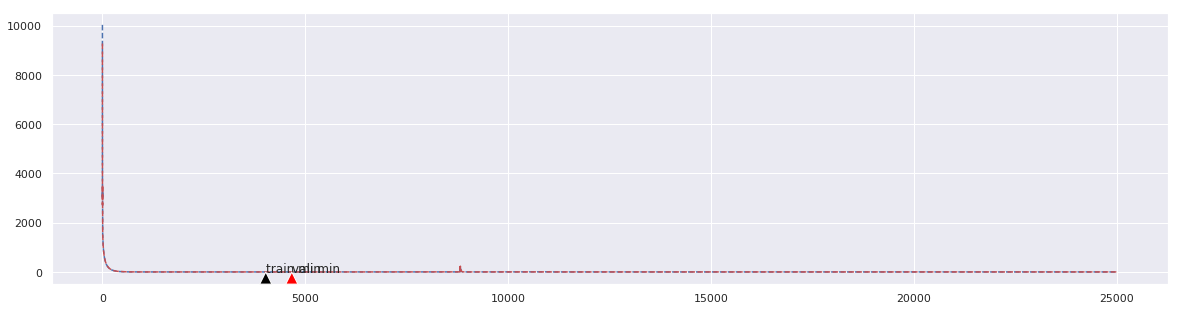

If we zoom into the curve we would have seen the following


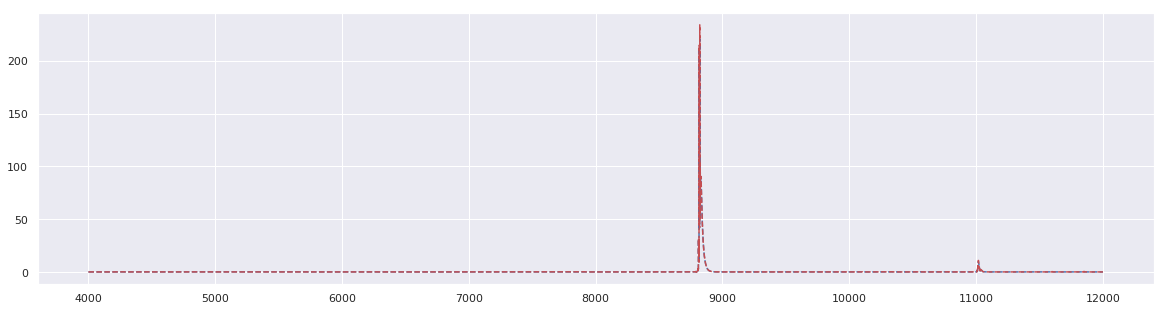

In [161]:
#Following variables are only used to zoom into the graph
start_observation_flag = 4000
end_observation_flag = 12000
learning_curve(start_observation_flag,end_observation_flag)

Both of the curve actually seems to be on top of each other.The reason is:
-  I have applied log transformation on the SalePrice and I have also transformed all my numerical data thats why the difference between the training loss and validation loss seems to be very small and very stable.
- For loss function I have used Mean Squared Error (MSE). For reducing MSE I have used SUM_BY_NONZERO_WEIGHTS which divided scalar sum  by number of non-zero weights. MSE calculates squared error for all the data and then calculate the mean. Now, all my SalePrice is very small due to normalization (between 10 to 13.5). Where mean of saleprice is 12.02 . Suppose in nth epoch if
    - for training loss
        - a saleprice is 11.5 and prediction is 12  Squred error .25
        - another saleprice is 13 and prediction is 12  Squred error 1
        - another saleprice is 12.5 and prediction is 12 Squred error .25
        - another saleprice is 11.5 and prediction is 12 Squred error .25
        - another saleprice is 10.3 and prediction is 12 Squred error 1.7
        
      **MSE = (.25+1+.25+.25+1.7)/5 = .69**
    - for validation loss
        - another saleprice is 12.9 and prediction is 12 Squred error .81
        - another saleprice is 13.3 and prediction is 12 Squred error 1.69
        - another saleprice is 10.8 and prediction is 12 Squred error 1.44
        - another saleprice is 11.3 and prediction is 12 Squred error .49
        - another saleprice is 11.8 and prediction is 12 Squred error .04
        
      **MSE = (.81+1.69+1.44+.49+.04)/5 = .894**
      
      **Difference between validation loss and training loss is .204**
      
    Usually in regression problem neural network stats to predicts the average value within 5-20 epoch so very quickly the difference between val_loss and training_loss gets much lower. In our dummy example difference is already .204 and if its epoch no is 10, by the time it reaches to 500 epoch the difference could go as low as 10^-4.

#### ANN 2
In this section changed variables are

- learning rate = .05


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 8 Neuron | .005
|2nd hidden layer | 32 Neuron | .1
|3rd hidden layer | 16 Neuron | 0.05
|4th hidden layer | 8 Neuron | 0

In [168]:
tf.reset_default_graph()
learning_rate = 0.05
num_steps = 18000
#for regularize weight matrix
beta1 = 0.005
beta2 = 0.1
beta3 = 0.05
beta4 = 0.0

hidden_1 = 8
hidden_2 = 32
hidden_3 = 16
hidden_4 = 8


minimum_validation_loss = 0.02101000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []


In [169]:
training_block(X_train,y_train, X_val,y_val)
prediction = Prediction_block(X_val)

test_rmse_score, test_r2_score = accuracy(y_val,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
# learning_curve(start_observation_flag,end_observation_flag)



pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training loss:  0.858677   validation loss:  1.0680902     minimum_validation_loss 0.02101
epoch no :  1000   training loss:  0.19457059   validation loss:  0.27591604     minimum_validation_loss 0.02101
epoch no :  1500   training loss:  0.056262337   validation loss:  0.088357836     minimum_validation_loss 0.02101
epoch no :  2000   training loss:  0.023808574   validation loss:  0.053168852     minimum_validation_loss 0.02101
epoch no :  2500   training loss:  0.038034473   validation loss:  0.05537057     minimum_validation_loss 0.02101
epoch no :  3000   training loss:  0.012828972   validation loss:  0.026433188     minimum_validation_loss 0.02101
epoch no :  3500   training loss:  0.011956884   validation loss:  0.018907022     minimum_validation_loss 0.018319204
epoch no :  4000   training loss:  0.019972812   validation loss:  0.023553263     minimum_validation_loss 0.016269118
epoch no :  4500   training loss:  0.015091223   validation loss:  0.021799197   

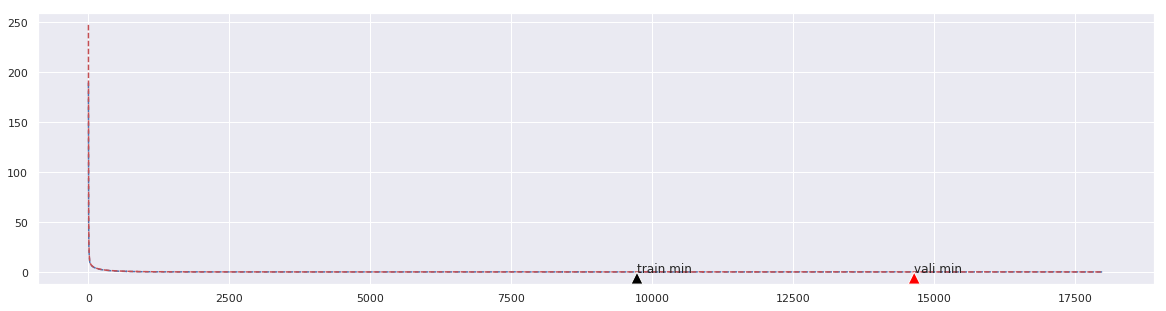

If we zoom into the curve we would have seen the following


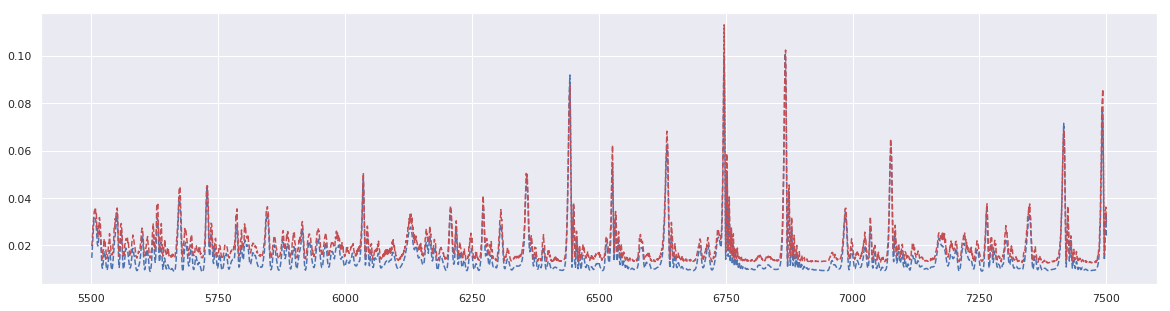

In [170]:
#Following variables are only used to zoom into the graph
start_observation_flag = 5500
end_observation_flag = 7500
learning_curve(start_observation_flag,end_observation_flag)

#### ANN 3
- learning rate = .05


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 16 Neuron | .1
|2nd hidden layer | 8 Neuron | .0
|3rd hidden layer | 4 Neuron | 0.0
|4th hidden layer | 2 Neuron | 0

In [171]:
tf.reset_default_graph()
learning_rate = 0.05
num_steps = 15000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.0
beta3 = 0.0
beta4 = 0.0

hidden_1 = 16
hidden_2 = 8
hidden_3 = 4
hidden_4 = 2

minimum_validation_loss = 0.01901000

#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )


weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []

In [172]:
training_block(X_train,y_train, X_val,y_val)
prediction = Prediction_block(X_val)
test_rmse_score, test_r2_score = accuracy(y_val,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
# learning_curve(start_observation_flag,end_observation_flag)

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate,
                            'num_steps' : num_steps, 'beta1' : beta1, 
                            'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4,
                            'hidden_1' : hidden_1 , 'hidden_2' : hidden_2,
                            'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim ,
                            'test_rmse_score' : test_rmse_score , 
                            'test_r2_score' : test_r2_score}, ignore_index=True)
    
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training loss:  0.8051993   validation loss:  0.8233882     minimum_validation_loss 0.01901
epoch no :  1000   training loss:  0.041415274   validation loss:  0.04464606     minimum_validation_loss 0.01901
epoch no :  1500   training loss:  0.01773881   validation loss:  0.02033381     minimum_validation_loss 0.01901
epoch no :  2000   training loss:  0.055215415   validation loss:  0.055317916     minimum_validation_loss 0.015227657
epoch no :  2500   training loss:  0.01211351   validation loss:  0.014712055     minimum_validation_loss 0.013408737
epoch no :  3000   training loss:  0.016350279   validation loss:  0.01753673     minimum_validation_loss 0.013408737
epoch no :  3500   training loss:  0.052965235   validation loss:  0.05895138     minimum_validation_loss 0.01270032
epoch no :  4000   training loss:  0.034773506   validation loss:  0.03464886     minimum_validation_loss 0.01270032
epoch no :  4500   training loss:  0.074005865   validation loss:  0.07142

If we zoom into the curve we would have seen the following


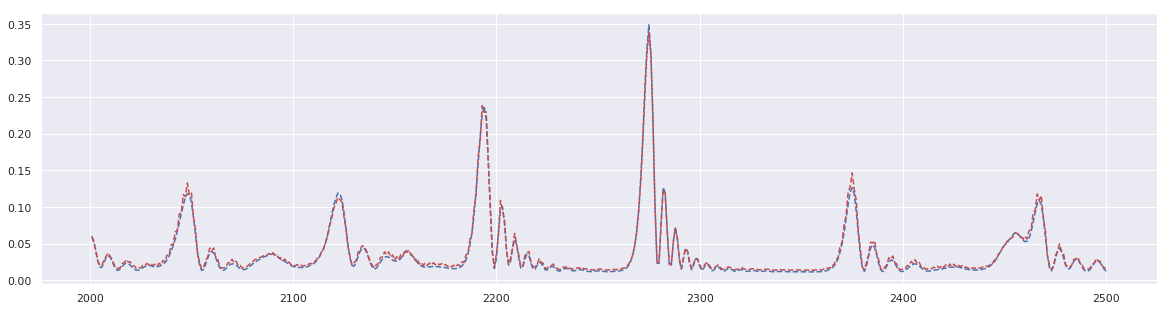

In [173]:
#Following variables are only used to zoom into the graph
start_observation_flag = 2000
end_observation_flag = 2500
learning_curve(start_observation_flag,end_observation_flag)

### Description on Learning curve and Accuracy:

We can observe where overfitting occurs. Overfitting actually occurs if the training
loss goes under the validation loss even though the validation is still dropping. It is
the sign that network is learning the patterns in the train set that are not applicable in
the validation done. In a short note we can say::
 <p> Overfitting : training loss << validation loss </p>
 <p> Underfitting : training loss >> validation loss</p>
 <p> Just right : training loss ~ validation loss </p>
 
According to this theory, for ANN 1,2 and 3 our both learning curve (validation loss and training loss) is exactly top of one another so in our case validation loss and training loss is almost same so we can say that our model is doing just the right thing. Again In validation score .11,.1081 and .1050 is impressive compared to other models.

Both of the curve actually seems to be on top of each other.The reason is:
-  I have applied log transformation on the SalePrice and I have also transformed all my numerical data thats why the difference between the training loss and validation loss seems to be very small and very stable.
- For loss function I have used Mean Squared Error (MSE). For reducing MSE I have used SUM_BY_NONZERO_WEIGHTS which divided scalar sum  by number of non-zero weights. MSE calculates squared error for all the data and then calculate the mean. Now, all my SalePrice is very small due to normalization (between 10 to 13.5). Where mean of saleprice is 12.02 . Suppose in nth epoch if
    - for training loss
        - a saleprice is 11.5 and prediction is 12  Squred error .25
        - another saleprice is 13 and prediction is 12  Squred error 1
        - another saleprice is 12.5 and prediction is 12 Squred error .25
        - another saleprice is 11.5 and prediction is 12 Squred error .25
        - another saleprice is 10.3 and prediction is 12 Squred error 1.7
        
      **MSE = (.25+1+.25+.25+1.7)/5 = .69**
    - for validation loss
        - another saleprice is 12.9 and prediction is 12 Squred error .81
        - another saleprice is 13.3 and prediction is 12 Squred error 1.69
        - another saleprice is 10.8 and prediction is 12 Squred error 1.44
        - another saleprice is 11.3 and prediction is 12 Squred error .49
        - another saleprice is 11.8 and prediction is 12 Squred error .04
        
      **MSE = (.81+1.69+1.44+.49+.04)/5 = .894**
      
      **Difference between validation loss and training loss is .204**
      
    Usually in regression problem neural network stats to predicts the average value within 5-20 epoch so very quickly the difference between val_loss and training_loss gets much lower. In our dummy example difference is already .204 and if its epoch no is 10, by the time it reaches to 500 epoch the difference could go as low as 10^-4.

## ANN single hidden layer

In [197]:
tf.reset_default_graph()
def weight_bais():
    global weights, biases
    weights = {
        'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
        'out': tf.Variable(tf.random_normal([hidden_1, output_dim]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden_1])),
        'out': tf.Variable(tf.random_normal([output_dim]))
    }

In [198]:
def ann_model(X_input):
  # Hidden layers
    layer_1 = tf.add(tf.matmul(X_input, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Output layer
    layer_out = tf.matmul(layer_1, weights['out'])+ biases['out']

    return layer_out

In [199]:
def miscellaneous_initialization():
    global model, loss , regularizer_1 , regularizer_2 ,regularizer_3, regularizer_4, optimizer , init , saver
    # Model Construct
    model = ann_model(X_tf)

    # Mean Squared Error loss function
    loss = tf.losses.mean_squared_error(y_tf , model , reduction=tf.losses.Reduction.SUM_BY_NONZERO_WEIGHTS)

    # loss = tf.square(y_tf - model)
    regularizer_1 = tf.nn.l2_loss(weights['w1'])

    # loss = tf.reduce_mean(loss + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3)
    loss = tf.reduce_mean(loss + beta1*regularizer_1 )

    # Adam optimizer will update weights and biases after each step
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


    # Initialize variables 
    init = tf.global_variables_initializer()

    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()


#### ANN 4
- learning rate = .1


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 16 Neuron | .1

In [200]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 15000
#for regularize weight matrix
beta1 = 0.1
beta2 = None
beta3 = None
beta4 = None
minimum_validation_loss = 0.01901000
hidden_1 = 16
hidden_2 = None
hidden_3 = None
hidden_4 = None

#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []
training_block(X_train,y_train, X_val,y_val)
prediction = Prediction_block(X_val)

test_rmse_score, test_r2_score = accuracy(y_val,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
# learning_curve(start_observation_flag,end_observation_flag)


pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training loss:  0.34714127   validation loss:  0.3548761     minimum_validation_loss 0.01901
epoch no :  1000   training loss:  0.023464948   validation loss:  0.026027663     minimum_validation_loss 0.01901
epoch no :  1500   training loss:  0.01376116   validation loss:  0.015662506     minimum_validation_loss 0.015705008
epoch no :  2000   training loss:  0.013004313   validation loss:  0.014583082     minimum_validation_loss 0.013397736
epoch no :  2500   training loss:  0.011678733   validation loss:  0.013094134     minimum_validation_loss 0.013072391
epoch no :  3000   training loss:  0.012384469   validation loss:  0.013858578     minimum_validation_loss 0.012847684
epoch no :  3500   training loss:  0.01125925   validation loss:  0.012632536     minimum_validation_loss 0.012594412
epoch no :  4000   training loss:  0.011583656   validation loss:  0.012851575     minimum_validation_loss 0.012523619
epoch no :  4500   training loss:  0.01272952   validation los

If we zoom into the curve we would have seen the following


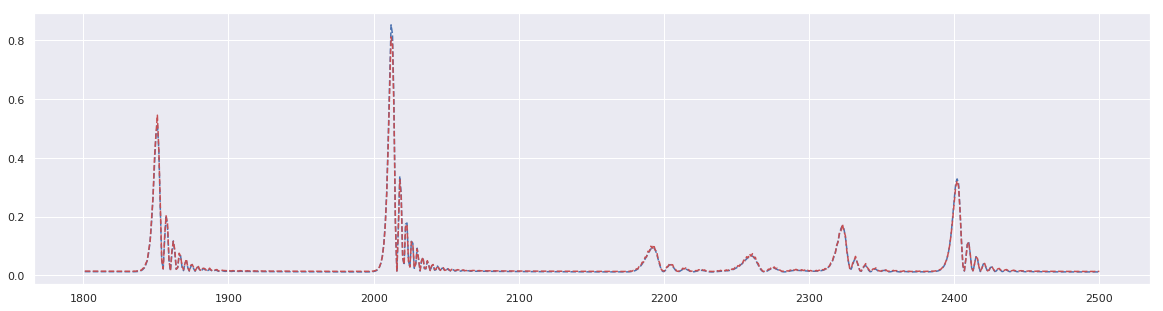

In [201]:
#Following variables are only used to zoom into the graph
start_observation_flag = 1800
end_observation_flag = 2500
learning_curve(start_observation_flag,end_observation_flag)

#### ANN 5
- learning rate = .1


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 4 Neuron | .1

In [149]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 8000
#for regularize weight matrix
beta1 = 0
beta2 = None
beta3 = None
beta4 = None

hidden_1 = 4
hidden_2 = None
hidden_3 = None
hidden_4 = None
minimum_validation_loss = 0.1701000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )


weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []

In [150]:
training_block(X_train,y_train, X_val,y_val)
prediction = Prediction_block(X_val)

test_rmse_score, test_r2_score = accuracy(y_val,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
# learning_curve(start_observation_flag,end_observation_flag)

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training loss:  0.48890418   validation loss:  0.9536614     minimum_validation_loss 0.1701
epoch no :  1000   training loss:  0.33397388   validation loss:  0.64465207     minimum_validation_loss 0.1701
epoch no :  1500   training loss:  0.19940132   validation loss:  0.3847879     minimum_validation_loss 0.1701
epoch no :  2000   training loss:  0.10171368   validation loss:  0.19967784     minimum_validation_loss 0.1701
epoch no :  2500   training loss:  0.04576936   validation loss:  0.09630603     minimum_validation_loss 0.09643989
epoch no :  3000   training loss:  0.023093684   validation loss:  0.05485344     minimum_validation_loss 0.054900542
epoch no :  3500   training loss:  0.016941296   validation loss:  0.043713126     minimum_validation_loss 0.04372082
epoch no :  4000   training loss:  0.014740163   validation loss:  0.0418022     minimum_validation_loss 0.041696236
epoch no :  4500   training loss:  0.013993759   validation loss:  0.043727703     min

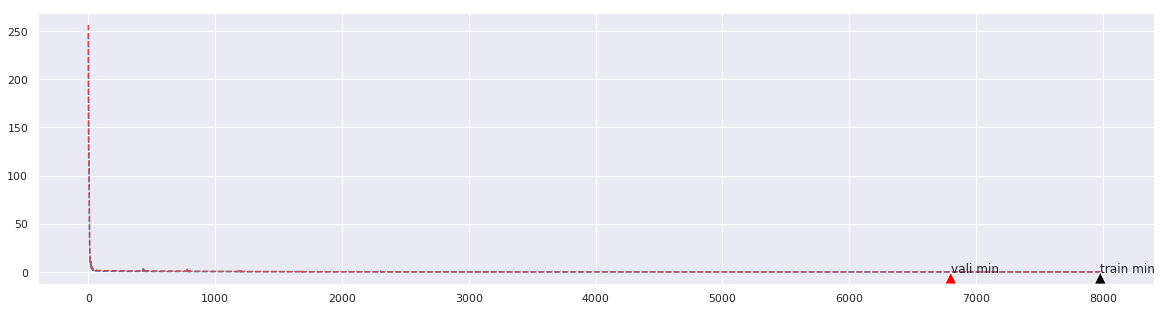

If we zoom into the curve we would have seen the following


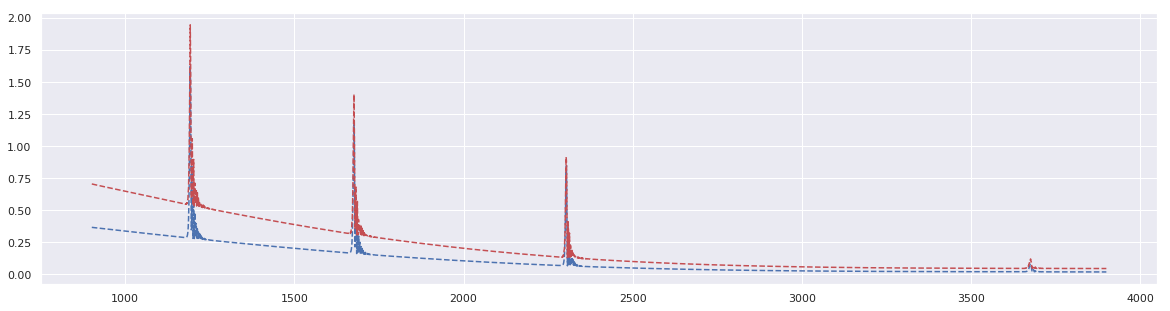

In [151]:
#Following variables are only used to zoom into the graph
start_observation_flag = 900
end_observation_flag = 3900
learning_curve(start_observation_flag,end_observation_flag)

#### ANN 6
- learning rate = .1


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 2 Neuron | .1

In [207]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 15000
#for regularize weight matrix
beta1 = 0
beta2 = None
beta3 = None
beta4 = None

hidden_1 = 2
hidden_2 = None
hidden_3 = None
hidden_4 = None
minimum_validation_loss = 0.01901000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )


weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []

epoch no :  500   training loss:  0.3733865   validation loss:  0.68490076     minimum_validation_loss 0.01901
epoch no :  1000   training loss:  0.21507877   validation loss:  0.38549396     minimum_validation_loss 0.01901
epoch no :  1500   training loss:  0.10218448   validation loss:  0.1728542     minimum_validation_loss 0.01901
epoch no :  2000   training loss:  0.042495888   validation loss:  0.063744135     minimum_validation_loss 0.01901
epoch no :  2500   training loss:  0.021686587   validation loss:  0.027390916     minimum_validation_loss 0.01901
epoch no :  3000   training loss:  0.008313624   validation loss:  0.012764412     minimum_validation_loss 0.01257122
epoch no :  3500   training loss:  0.008033975   validation loss:  0.01344995     minimum_validation_loss 0.01257122
epoch no :  4000   training loss:  0.0078740325   validation loss:  0.013511795     minimum_validation_loss 0.01257122
epoch no :  4500   training loss:  0.0077958964   validation loss:  0.0142271   

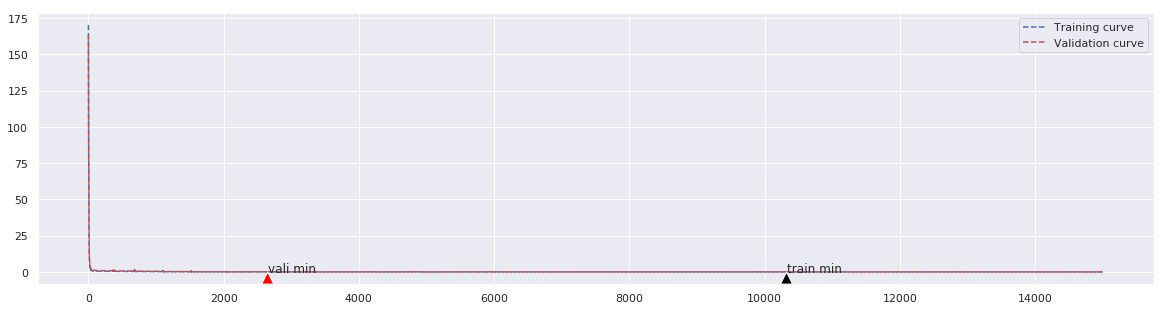

If we zoom into the curve we would have seen the following


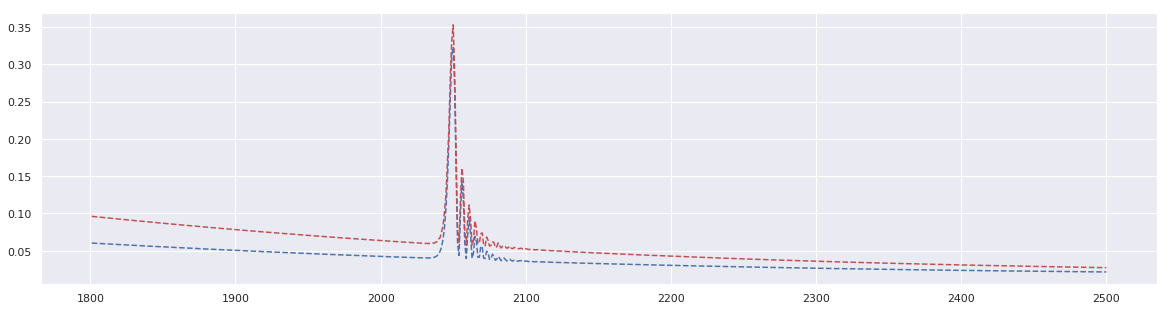

In [208]:
training_block(X_train,y_train, X_val,y_val)
prediction = Prediction_block(X_val)

test_rmse_score, test_r2_score = accuracy(y_val,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
learning_curve(start_observation_flag,end_observation_flag)

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

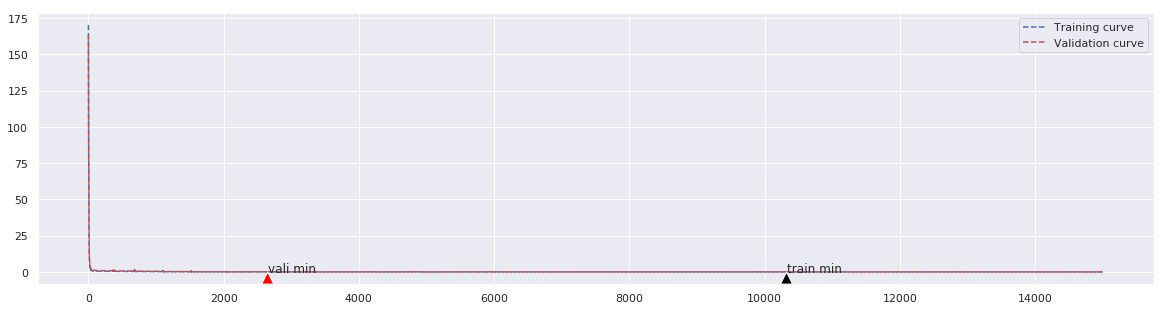

If we zoom into the curve we would have seen the following


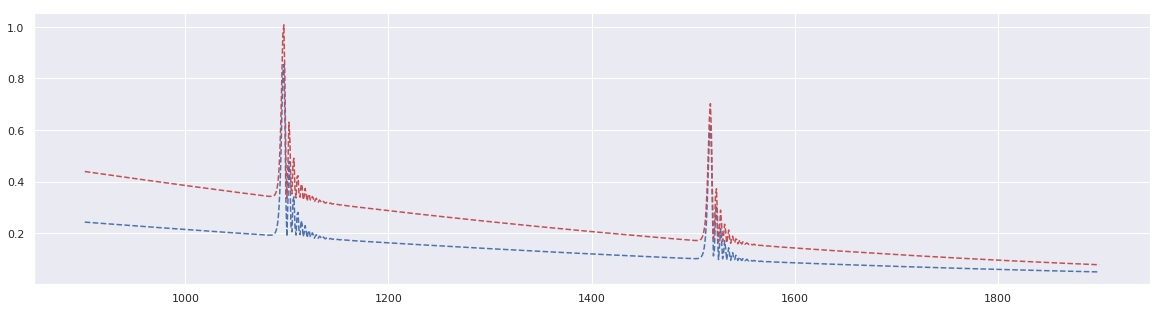

In [209]:
#Following variables are only used to zoom into the graph
start_observation_flag = 900
end_observation_flag = 1900
learning_curve(start_observation_flag,end_observation_flag)

### Description on Learning curve and Accuracy:

We can observe where overfitting occurs. Overfitting actually occurs if the training
loss goes under the validation loss even though the validation is still dropping. It is
the sign that network is learning the patterns in the train set that are not applicable in
the validation done. In a short note we can say::
 <p> Overfitting : training loss << validation loss </p>
 <p> Underfitting : training loss >> validation loss</p>
 <p> Just right : training loss ~ validation loss </p>
 
According to this theory, for ANN 4 our both learning curve (validation loss and training loss) is exactly top of one another so in our case validation loss and training loss is almost same so we can say that our model is doing just the right thing. Again In validation score .1059  is impressive compared to other models.

But for ANN 5 and 6  training loss << validation loss so we can say that this two model overfit data due to lower amount of neuron but ANN 4 have just the right amount of neuron thats why with similar parameter this overfit occered.

Sometimes Both of the curve actually seems to be on top of each other.The reason is:
-  I have applied log transformation on the SalePrice and I have also transformed all my numerical data thats why the difference between the training loss and validation loss seems to be very small and very stable.
- For loss function I have used Mean Squared Error (MSE). For reducing MSE I have used SUM_BY_NONZERO_WEIGHTS which divided scalar sum  by number of non-zero weights. MSE calculates squared error for all the data and then calculate the mean. Now, all my SalePrice is very small due to normalization (between 10 to 13.5). Where mean of saleprice is 12.02 . Suppose in nth epoch if
    - for training loss
        - a saleprice is 11.5 and prediction is 12  Squred error .25
        - another saleprice is 13 and prediction is 12  Squred error 1
        - another saleprice is 12.5 and prediction is 12 Squred error .25
        - another saleprice is 11.5 and prediction is 12 Squred error .25
        - another saleprice is 10.3 and prediction is 12 Squred error 1.7
        
      **MSE = (.25+1+.25+.25+1.7)/5 = .69**
    - for validation loss
        - another saleprice is 12.9 and prediction is 12 Squred error .81
        - another saleprice is 13.3 and prediction is 12 Squred error 1.69
        - another saleprice is 10.8 and prediction is 12 Squred error 1.44
        - another saleprice is 11.3 and prediction is 12 Squred error .49
        - another saleprice is 11.8 and prediction is 12 Squred error .04
        
      **MSE = (.81+1.69+1.44+.49+.04)/5 = .894**
      
      **Difference between validation loss and training loss is .204**
      
    Usually in regression problem neural network stats to predicts the average value within 5-20 epoch so very quickly the difference between val_loss and training_loss gets much lower. In our dummy example difference is already .204 and if its epoch no is 10, by the time it reaches to 500 epoch the difference could go as low as 10^-4.

### Hyperparameeter tuning
Few of my hyperparameeter tuning is shown in the following block. In this data if a hidden layer value is 0 then it means that the hidden layer is turned off. For example if hidden_3 = 0 then that means hidden layer 3 is removed from the model and the model have only 2 hidden layer. And all the score is done on a validation set which is not seen by the model while training. For most of the case it was a 80-20 split. In the following results I didint kept any cross validation results but I have used diffrent seed while splitting data due to diffrent seed sometimes good hyperparameeter also provided so so accuracy. 

In [1]:
import pandas as pd
log_df = pd.read_csv("diffrent_training_results.csv")
# print(log_df.to_string())
pd.set_option('display.max_rows', None)
log_df

learning_rate  num_steps  beta1   beta2     beta3  hidden_1  hidden_2  \
0            0.050     7500.0  0.005  0.0050  0.005000      16.0       8.0   
1            0.040     2500.0  0.005  0.0050  0.005000      16.0       8.0   
2            0.050     7500.0  0.005  0.0050  0.005000      16.0       8.0   
3            0.050     7500.0  0.005  0.0050  0.005000      16.0       8.0   
4            0.050     7500.0  0.005  0.0050  0.005000      16.0       8.0   
5            0.050     7900.0  0.005  0.0050  0.005000      16.0       8.0   
6            0.050     1500.0  0.005  0.0050  0.005000      16.0       8.0   
7            0.050     1500.0  0.005  0.0050  0.005000      16.0       8.0   
8            0.050     7500.0  0.005  0.0050  0.005000      16.0       8.0   
9            0.050     7500.0  0.005  0.0050  0.005000      16.0       8.0   
10           0.100     7500.0  0.005  0.0050  0.005000      16.0       8.0   
11           0.100     7500.0  0.005  0.0050  0.005000      16.0       8.0   
12           0.010     7500.0  0.005  0.0050  0.005000      16.0       8.0   
13           0.010     7500.0  0.005  0.0050  0.005000      16.0       8.0   
14           0.010     7500.0  0.005  0.0050  0.005000      16.0       8.0   
15           0.100     3500.0  0.005  0.0050  0.005000      16.0       8.0   
16           0.100     2800.0  0.005  0.0050  0.005000      16.0       8.0   
17           0.100     2500.0  0.005  0.0050  0.005000      16.0       8.0   
18           0.100     8500.0  0.005  0.0050  0.005000      16.0       8.0   
19           0.050     8500.0  0.005  0.0050  0.005000      16.0       8.0   
20           0.100     2500.0  0.005  0.0050  0.005000      16.0       8.0   
21           0.100     9500.0  0.005  0.0050  0.005000      16.0       8.0   
22           0.001     9500.0  0.005  0.0050  0.005000      16.0       8.0   
23           0.005     9500.0  0.005  0.0050  0.005000      16.0       8.0   
24           0.100     7500.0  0.005  0.0050  0.005000      16.0       8.0   
25           0.100    12500.0  0.005  0.0050  0.005000      16.0       8.0   
26           0.100    11500.0  0.005  0.0050  0.005000      16.0       8.0   
27           0.050    11500.0  0.005  0.0050  0.005000      16.0       8.0   
28           0.050    11000.0  0.005  0.0050  0.005000      16.0       8.0   
29           0.050    11000.0  0.005  0.0050  0.005000      16.0       8.0   
30           0.050    11000.0  0.005  0.0050  0.005000      16.0       8.0   
31           0.010    11000.0  0.005  0.0050  0.005000      16.0       8.0   
32           0.100    11000.0  0.005  0.0050  0.005000      16.0       8.0   
33           0.100    11000.0  0.005  0.0050  0.000000      16.0       8.0   
34           0.050    13000.0  0.005  0.0050  0.000000      16.0       8.0   
35           0.100    23000.0  0.005  0.0050  0.000000      16.0       8.0   
36           0.100    23000.0  0.005  0.0050  0.005000      16.0       8.0   
37           0.050    23000.0  0.005  0.0050  0.005000      16.0       8.0   
38           0.050    23000.0  0.005  0.0050  0.005000      16.0       8.0   
39           0.050    23000.0  0.000  0.0000  0.000000      16.0       8.0   
40           0.050    23000.0  0.000  0.0000  0.000000      16.0       8.0   
41           0.100    23000.0  0.000  0.0000  0.000000      16.0       8.0   
42           0.100    17000.0  0.000  0.0000  0.000000      16.0       8.0   
43           0.001     3000.0  0.100  0.0000  0.000000      16.0       8.0   
44           0.001     3000.0  0.050  0.0000  0.000000      16.0       8.0   
45           0.100     3000.0  0.100  0.0000  0.000000      16.0       8.0   
46           0.100     3000.0  0.010  0.0000  0.000000      16.0       8.0   
47           0.100    13000.0  0.100  0.0000  0.000000      16.0       8.0   
48           0.100     2500.0  0.100  0.0000  0.000000      16.0       8.0   
49           0.100     3000.0  0.100  0.1000  0.000000      16.0       8.0   
50           0.100     4000

### Observation and discovery :


- In the above parameter we can see that index 44 shows that for .001 learning parameter the model does not predict anything so I have changed it slowly and finally What I have found that learning parameter .1 and .05 provides the best results. 

- Beta1, Beta2, Beta3, Beta4 represents the regularization parameter for hidden layer 1 ,2 ,3 and 4. Sometimes in the above table we can see that hidden layer 2,3,4 is 0 or NaN but there is some value for beta 2,3,4 that means the layer is actually off so those values actually means nothing. 

- For 3 layer model when beta1, beta2, beta3  is .005, model shows significant amount of improvement while learning rate is .1 or .05 . But when learning rate is .1 and beta1=.1 , beta2=0, beta3=0 then the model performs even better most of the time and it also takes less epochs to train for the best validation accuracy

- From index 63 to 69 I have tried to use 200 , 100 , 30 neurons because the data have 403 features and its a common practice to use half amount of the neuron in the first hidden layer and this strategy does not work good enough but with my selected parameter it improved a little bit. I have used 16-8-4 combination of neuron because of this common practice. for our case 16 neuron in the first layer provided better accuracy and adding 8 and 4 in the next 2 layer improved the stability of the model and now it gives good validation accuracy after 2000 epoch and the best validation accuracy remains between the epoch range of 2000-2500 , 3300-3600 or 5000-5400 .

- From index 70 to 78 we can see that single neuron with single hidden layer performs well according to the plan stated in the target section. Then I have increased neurons and the learning curve for them is in the following block. Where y axis shows rmse and x axis shows i and i*50 represents the epoch no. Again blue curve is for training accuracy and green for validation accuracy

- In the table index 169 and 155 the model is exactly same with same parameter but one of them is providing .123 and other is providing .41 and that shows how inconsistent model become when we increase the neuron of the first hidden layer. 

- We can see that even after adding another layer ANN does not perform well when we are increasing neurons in the first layer. The reason behind it is that this type of regression problem usually do well with logistic regression. By increasing neurons we cant do much improvement and all we need to do is properly regularize small amount of neurons so that they can perform well.

#### For single neuron learning rate


- ![alt text](img/1.png)


#### For 4 neuron learning curve


- ![alt text](img/4.png)


#### For 16 neuron learning curve


- ![alt text](img/16.png)


#### For 32 neuron learning curve


- ![alt text](img/32.png)


- From the above graph we can say that for single neuron learning curve is not very stable but when neuron increases upto 32 that curve become smoother. But when submitted to kaggle 16 neuron performs better than 32 and 4 so choosing it over others is helpful. 

<br>
<br>

# Ensemble
I am using bagging method for this section. Usually in this technique we add different models results and average them. But instead of averaging I am taking different fraction from different models result. Finally making sure that it sums up to 1. 

I have tried different combinations of ensemble learning to improve performance. Kaggle has a certain limitation on uploading submission files. So what I have tried is that before submitting it to kaggle, I have made 80-20 split. I made prediction on the 20% data. Then I have tried ensemble learning so that before submission I can confirm which combination might work well.

Following 3 section arranges diffrent prediction results for ensembling. 

In [229]:
x = ['Random Forest Regressor',
     'DecisionTree','Xgboost','Lasso',
     'ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None',
     'ANN_lr0.1_beta0.1-0.05-0.0-0.0_hidden76-48-32-16',
     'ANN_lr0.05_beta0.005-0.1-0.05-0.0_hidden8-32-16-8',
     'ANN_lr0.05_beta0.1-0.0-0.0-0.0_hidden16-8-4-2',
     'ANN_lr0.1_beta0.1-None-None-None_hidden16-None-None-None',
     'ANN_lr0.1_beta0-None-None-None_hidden4-None-None-None',
     'ANN_lr0.1_beta0-None-None-None_hidden2-None-None-None']

In [230]:
d = dict()
for k in x:
    d[k] = prediction_dict[k]
prediction_dict = d

In [231]:

if submit :
    pred_df = pd.read_csv("diffrent_pred_results.csv")
else:
    pred_df = pd.read_csv("pred_results.csv")
    
    
if not submit:
    pd.set_option('display.max_colwidth', -1)
    pred_df = pd.DataFrame(prediction_dict)
    pred_df.to_csv("pred_results.csv", encoding='utf-8',index=False)

else:
    pd.set_option('display.max_colwidth', -1)
    pred_df = pd.DataFrame(submit_prediction_dict)
    pred_df.to_csv("diffrent_pred_results.csv", encoding='utf-8',index=False)

pd.DataFrame(pred_df.columns)

0
0   Random Forest Regressor                                 
1   DecisionTree                                            
2   Xgboost                                                 
3   Lasso                                                   
4   ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None   
5   ANN_lr0.1_beta0.1-0.05-0.0-0.0_hidden76-48-32-16        
6   ANN_lr0.05_beta0.005-0.1-0.05-0.0_hidden8-32-16-8       
7   ANN_lr0.05_beta0.1-0.0-0.0-0.0_hidden16-8-4-2           
8   ANN_lr0.1_beta0.1-None-None-None_hidden16-None-None-None
9   ANN_lr0.1_beta0-None-None-None_hidden4-None-None-None   
10  ANN_lr0.1_beta0-None-None-None_hidden2-None-None-None

### Naming explanation of above table



| Name | learning rate |beta1 | beta 2 | beta 3 | beta 4 | hidden layer 1 | hidden layer 2 | hidden layer 3 | hidden layer 4 |
|------|---------------|------|--------|--------|--------|----------------|----------------|---------------|-----------------|
| ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None | 0.1 |0.1|0.0|0.0|None| 16|8|4|None
| ANN_lr0.05_beta0.005-0.1-0.05-0.0_hidden8-32-16-8| 0.05 |0.005|0.1|0.05|0| 8|32|16|6
| ANN_lr0.05_beta0.1-0.0-0.0-0.0_hidden16-8-4-2|.05 |0.1| 0.0 |0.0| 0.0 |16 |8 |4| 2
| ANN_lr0.1_beta0-None-None-None_hidden2-None-None-None | 0.1 | 0 | None | None |None |2 | None|None|None|
| ANN_lr0.1_beta0.1-0.05-0.0-0.0_hidden76-48-32-16 |0.1|.1|0.05|0.0|0.0|76|48|32|16
| ANN_lr0.1_beta0.1-None-None-None_hidden16-None-None-None | 0.1|0.1|None|None|None|16|None|None|None
| ANN_lr0.1_beta0-None-None-None_hidden4-None-None-None | 0.1|0|None|None|None|4|None|None|None

#### Ensemble Combination 1

In [232]:
# pred_df[pred_df.columns[[1,3,5]]] * [1,2,30]

print('Using  ' , pred_df.columns[[4,3,2]].values)


Using   ['ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None' 'Lasso' 'Xgboost']


In [233]:
prediction = pred_df[pred_df.columns[[4,3,2]]] * [.4,.2,.4]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_val, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

ann root mean absolute error:  0.10075045445576623
accuracy score:  0.9401051461891021


##### Kaggle score
- ![](img/ensemble3xg.png)

In [234]:
prediction = pred_df[pred_df.columns[[4,3,2]]] * [.4,.3,.3]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_val, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

ann root mean absolute error:  0.10101768287528032
accuracy score:  0.9397869970814289


#### Ensemble Combination 2

In [235]:
# pred_df[pred_df.columns[[1,3,5]]] * [1,2,30]

print('Using  ' , pred_df.columns[[2,4,5,6,7]].values)


Using   ['Xgboost' 'ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None'
 'ANN_lr0.1_beta0.1-0.05-0.0-0.0_hidden76-48-32-16'
 'ANN_lr0.05_beta0.005-0.1-0.05-0.0_hidden8-32-16-8'
 'ANN_lr0.05_beta0.1-0.0-0.0-0.0_hidden16-8-4-2']


In [236]:
prediction = pred_df[pred_df.columns[[2,4,5,6,7]]] * [.25,.2,.2 ,.15 , .2]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_val, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

ann root mean absolute error:  0.09941663280977221
accuracy score:  0.9416805283100553


##### Kaggle score
- ![](img/annxgb.png)

#### Ensemble Combination 3

In [237]:
print('Using  ' , pred_df.columns[[0,4,5,6,7]].values)

Using   ['Random Forest Regressor'
 'ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None'
 'ANN_lr0.1_beta0.1-0.05-0.0-0.0_hidden76-48-32-16'
 'ANN_lr0.05_beta0.005-0.1-0.05-0.0_hidden8-32-16-8'
 'ANN_lr0.05_beta0.1-0.0-0.0-0.0_hidden16-8-4-2']


In [238]:
prediction = pred_df[pred_df.columns[[0,4,5,6,7]]] * [.25,.2,.2 ,.15 , .2]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_val, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

ann root mean absolute error:  0.1010286851201982
accuracy score:  0.9397738802831993


##### Kaggle score

- ![](img/2522152.png)

#### Ensemble Combination 4

In [239]:
print('Using  ' , pred_df.columns[[4,5,6,7,0,2,3]].values)

Using   ['ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None'
 'ANN_lr0.1_beta0.1-0.05-0.0-0.0_hidden76-48-32-16'
 'ANN_lr0.05_beta0.005-0.1-0.05-0.0_hidden8-32-16-8'
 'ANN_lr0.05_beta0.1-0.0-0.0-0.0_hidden16-8-4-2' 'Random Forest Regressor'
 'Xgboost' 'Lasso']


In [240]:
prediction = pred_df[pred_df.columns[[4,5,6,7,0,2,3]]] * [.15,.1,.1,.05,.0,.2,.4]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_val, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

ann root mean absolute error:  0.1004754821798716
accuracy score:  0.9404316350340652


##### Kaggle score
- ![](img/kaggle_score.png)

Ensemble combination 4 provides the best score which is 0.12192. Currently combination 4 is  showing that rmse value is .1004 and there is a worse value present in combination 1 which is 0.1017. The reason behind the difference is ANN does not perform exactly same each time. That means if I currently submit with Combination 1 I might get better results than Combination 4 .

In Combination 4 used models with their parameters: 

| Name | learning rate |beta1 | beta 2 | beta 3 | beta 4 | hidden layer 1 | hidden layer 2 | hidden layer 3 | hidden layer 4 |Fraction taken|
|------|---------------|------|--------|--------|--------|----------------|----------------|---------------|-----------------|-------|
| ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None | 0.1 |0.1|0.0|0.0|None| 16|8|4|None|.15
| ANN_lr0.05_beta0.005-0.1-0.05-0.0_hidden8-32-16-8| 0.05 |0.005|0.1|0.05|0| 8|32|16|6|.1
| ANN_lr0.05_beta0.1-0.0-0.0-0.0_hidden16-8-4-2|.05 |0.1| 0.0 |0.0| 0.0 |16 |8 |4| 2|.05
| ANN_lr0.1_beta0.1-0.05-0.0-0.0_hidden76-48-32-16 |0.1|.1|0.05|0.0|0.0|76|48|32|16|.1
| Xgboost | 0.05 | Not applicable | Not applicable | Not applicable |Not applicable | Not applicable| Not applicable|NonNot applicablee|Not applicable|.2
| Lasso |alpha = 5e-4| Not applicable | Not applicable | Not applicable |Not applicable | Not applicable| Not applicable|NonNot applicablee|Not applicable|.4


#### Obesrvation
In the learning curve graph if the minimum of training and validation is close to each other then its good to use that model. Again if training minimum and validation minimum is no where near each other then using them does not help much most of the case. When both of them are close we can use the epoch no of the train_min loss as val_min loss epoch no and then we can train over all the dataset without depending on the epoch number. The model does not give same result in same epoch every time. This is the main reason behind removing the epoch dependency.

# Prepare Submission File
To use this section please uncomment the last line of split data section and comment accuracy section.

In [ ]:
pd.DataFrame(pred_df.columns)

In [241]:
use_ensemble = True
#if ensemble =false then chose a model
choose_model = 5
#if want to use given test data
if submit:
    X_val = test_processed
    if not use_ensemble:
        prediction = pred_df[pred_df.columns[[choose_model]]]

    prediction = np.exp(prediction.values)

    pred_out_df = pd.DataFrame(prediction, index=test["Id"], columns=["SalePrice"])
    pred_out_df.to_csv('output.csv', header=True, index_label='Id')


# Conclusion & Kaggle score Discussion: 
My target of this report was to improve ANN model and show how well it can perform with ANN model. In the beginning of the report I have build a ANN model that performs better than any other single ANN model. I have performed cross validation on that model and that model scored 0.12324 in kaggle. Then I have showed some other models that performs well but can't beat the score .12324 . Then I have explained why some models with certain parameter works well. After that I showed a table where different models performance is listed and added my analysis and observation. Then I have have Showed four combination of Ensemble and their kaggle score is also attached with them. In the 4th combination of Ensemble method I have found the best kaggle score which is 0.12192. This is the overall best score and achived through combining 4 ann models, xgboost and lasso.

# Reference


## xgboost:
https://www.kaggle.com/dansbecker/xgboost

https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5



## regression + graph :
https://www.kaggle.com/janiobachmann/predicting-house-prices-regression-techniques


## Selecting and Filtering Data
https://www.kaggle.com/dansbecker/selecting-and-filtering-in-pandas

## Handling Missing Values
https://www.kaggle.com/dansbecker/handling-missing-values



## why use conditional probability coding
https://medium.com/airbnb-engineering/designing-machine-learning-models-7d0048249e69

## one hot encoding
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

https://medium.com/@rajatgupta310198/getting-started-with-neural-network-for-regression-and-tensorflow-58ad3bd75223

## class example
https://colab.research.google.com/drive/1MExQ52bvHSPaUrGe8RvHZifvE6K6a0qh?fbclid=IwAR2EUWi4q6_q0mFbXQwGh4GNgB2Ex_WpP3K0L12182PdzszWSsEfzHf0REo#forceEdit=true&offline=true&sandboxMode=true&scrollTo=-Rh3-Vt9Nev9

## Why cross validation
https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79

## Standardize or Normalize? 
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

## Decision Tree - Regression
https://www.saedsayad.com/decision_tree_reg.htm

## Some more
https://www.kaggle.com/klyusba/house-prices-advanced-regression-techniques/lasso-model-for-regression-problem/notebook

https://www.kaggle.com/juliencs/house-prices-advanced-regression-techniques/a-study-on-regression-applied-to-the-ames-dataset/ 

https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

## For descriptive section 
I have inspired form Ian Goodfellows book and used his way of explanation to explain my choice. His book can be found here:
https://www.deeplearningbook.org/

I have also followed data flatter for definition and their lessons can be found here:
https://data-flair.training/blogs/neural-network-for-machine-learning/